<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Transformación de variables categóricas, clasificación con K Nearest Neighbor (KNN), optimización y visualización de resultados - Enfermedad Cardiaca</h1> </div>

# **Transformación de variables categóricas, clasificación con K Nearest Neighbor (KNN), optimización y visualización de resultados**

**Desarrollado por:** Michael Israel Lata Zambrano  
**Correo:** mlataz@est.ups.edu.ec  

---

## **Estructura de la práctica**

1. **Definiciones de análisis de datos**
   - Introducción al análisis de datos.
   - Importancia de la transformación y preprocesamiento de datos.

2. **Tipos de variables**
   - Variables categóricas (nominales y ordinales).
   - Variables numéricas (discretas y continuas).
   - Técnicas de transformación aplicadas.

3. **Actividades del análisis exploratorio**
   - Carga y descripción del dataset.
   - Análisis de valores faltantes y estadísticos básicos.
   - Análisis de correlación entre variables.

4. **Ejemplo práctico de análisis exploratorio**
   - Transformación de variables categóricas y numéricas.
   - Selección de variables relevantes.
   - Visualización de datos (mapas de calor, gráficos de dispersión, etc.).

5. **Referencias y enlaces**
   - Fuentes utilizadas en formato APA.
   - Enlaces a la documentación de herramientas y bibliotecas.

---



# **Introducción**

En el ámbito del aprendizaje automático y la inteligencia artificial, el análisis de datos y la construcción de modelos predictivos son procesos fundamentales para resolver problemas complejos en diversas áreas, como la medicina, las finanzas y la industria. Este proyecto se centra en el desarrollo de un modelo de clasificación utilizando el algoritmo K Nearest Neighbor (KNN), aplicado al dataset *Heart Disease* del repositorio UCI Machine Learning. Este conjunto de datos contiene información clínica de pacientes y tiene como objetivo predecir la presencia o ausencia de enfermedades cardíacas basándose en un conjunto de características.

El proceso de construcción del modelo incluye varias etapas críticas, como la transformación de variables, la selección de características relevantes y la optimización de hiperparámetros. Estas etapas son esenciales para garantizar que el modelo sea preciso, eficiente y capaz de generalizar correctamente a nuevos datos. Además, se emplean técnicas de preprocesamiento, como la normalización y la estandarización, para preparar los datos y mejorar el rendimiento del modelo.

El algoritmo KNN es una técnica de clasificación supervisada que se basa en la proximidad de los datos en un espacio multidimensional. Aunque es sencillo de implementar, su rendimiento depende en gran medida de la calidad de los datos y de la elección adecuada de parámetros, como el número de vecinos (K) y la métrica de distancia utilizada. Por ello, este proyecto también incluye un análisis exhaustivo para optimizar estos parámetros y evaluar el impacto de las transformaciones de datos en el rendimiento del modelo.

---

# **Importancia**

La transformación de variables y el preprocesamiento de datos son pasos fundamentales en cualquier proyecto de aprendizaje automático. Los datos en bruto suelen contener valores faltantes, inconsistencias y escalas heterogéneas que pueden afectar negativamente el rendimiento de los modelos. En este contexto, la transformación de variables categóricas mediante técnicas como *OneHotEncoding* y *OrdinalEncoder*, así como la normalización y estandarización de variables numéricas, son esenciales para garantizar que los datos sean compatibles con los algoritmos de aprendizaje automático.

Además, la selección de características relevantes no solo mejora la precisión del modelo, sino que también reduce la complejidad computacional y evita el sobreajuste. En el caso del dataset *Heart Disease*, identificar las variables más influyentes para predecir enfermedades cardíacas puede tener un impacto significativo en la toma de decisiones clínicas y en la priorización de recursos médicos.

El algoritmo KNN, aunque simple, es una herramienta poderosa para la clasificación cuando se utiliza correctamente. Su capacidad para adaptarse a diferentes tipos de datos y métricas de distancia lo hace versátil, pero también requiere un ajuste cuidadoso de parámetros para evitar problemas como el sobreajuste o el subajuste. Este proyecto demuestra cómo la optimización de K y la elección de métricas de distancia pueden mejorar significativamente el rendimiento del modelo.


In [3]:
from time import time
from datetime import datetime, timedelta
import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config

import seaborn as sns
import seaborn  # no es necesario tener ambos, puedes quitar uno si no usas seaborn con alias
import pickle
import copy
from scipy import stats

print('Módulos importados')


Módulos importados


<div id="carga" style="color:#106ba3"><h3>Carga de dataset</h3> </div>

Nombre del dataset: **Heart Disease** (Enfermedad Cardíaca).

Enlace:  https://archive.ics.uci.edu/dataset/45/heart+diseaseq [2]

Descripción general: Este conjunto de datos clasifica a las personas según un conjunto de atributos clínicos, determinando la presencia o ausencia de enfermedad cardíaca.

Número de Variables (o atributos): 14

Número de instancias (Pacientes): 303

**Salida:**

TARGET (SIN ENFERMEDAD:1, CON ENFERMEDAD:2)

In [13]:
import pandas as pd

# Definir nombres de las variables (ajusta según el dataset de Heart Disease)
nombresVariables = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol', 'azucar_sangre', 'electrocardiograma', 
                    'frecuencia_cardiaca_maxima', 'angina', 'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'diagnostico']

# Cargar un dataframe desde la URL del dataset de Heart Disease
url_heart_disease = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
dfHeart = pd.read_csv(url_heart_disease, sep=',', names=nombresVariables)

# Mostrar información básica del dataset
print('Cantidad de observaciones (pacientes):', dfHeart.shape[0])
print('Cantidad de variables:', dfHeart.shape[1])
print(dfHeart.shape)
print(dfHeart.head())

Cantidad de observaciones (pacientes): 303
Cantidad de variables: 14
(303, 14)
   edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos 

<div id="formato-salida" style="color:#106ba3"><h3>Formato a la variable de salida</h3> </div>

In [14]:
# Convertir el diagnóstico en formato binario (0: sin enfermedad, 1: con enfermedad)
dfHeart['diagnostico'] = dfHeart['diagnostico'].replace([1, 2, 3, 4], 1)
print(dfHeart['diagnostico'].unique())
dfHeart.head()

[0 1]


,edad,sexo,dolor_toracico,presion_arterial,colesterol,azucar_sangre,electrocardiograma,frecuencia_cardiaca_maxima,angina,oldpeak,pendiente_ST,cantidad_vasos,thal,diagnostico
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
import pandas as pd

# Cargar el dataset desde la URL
url_heart_disease = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
nombresVariables = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol', 'azucar_sangre', 'electrocardiograma', 
                    'frecuencia_cardiaca_maxima', 'angina', 'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'diagnostico']
dfHeart = pd.read_csv(url_heart_disease, sep=',', names=nombresVariables)

# Aplicar one-hot encoding a variables categóricas
dfHeart_binario = pd.get_dummies(dfHeart, columns=['sexo', 'dolor_toracico', 'electrocardiograma', 'pendiente_ST', 'thal'])

# Mostrar el dataframe transformado
print(dfHeart_binario.head())

   edad  presion_arterial  colesterol  azucar_sangre  \
0  63.0             145.0       233.0            1.0   
1  67.0             160.0       286.0            0.0   
2  67.0             120.0       229.0            0.0   
3  37.0             130.0       250.0            0.0   
4  41.0             130.0       204.0            0.0   

   frecuencia_cardiaca_maxima  angina  oldpeak cantidad_vasos  diagnostico  \
0                       150.0     0.0      2.3            0.0            0   
1                       108.0     1.0      1.5            3.0            2   
2                       129.0     1.0      2.6            2.0            1   
3                       187.0     0.0      3.5            0.0            0   
4                       172.0     0.0      1.4            0.0            0   

   sexo_0.0  ...  electrocardiograma_0.0  electrocardiograma_1.0  \
0     False  ...                   False                   False   
1     False  ...                   False                  

In [16]:
import pandas as pd

# Cargar el dataset
url_heart_disease = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
nombresVariables = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol', 'azucar_sangre', 'electrocardiograma', 
                    'frecuencia_cardiaca_maxima', 'angina', 'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'diagnostico']
dfHeart = pd.read_csv(url_heart_disease, sep=',', names=nombresVariables)

# Aplicar one-hot encoding a variables categóricas
dfHeart_binario = pd.get_dummies(dfHeart, columns=['sexo', 'dolor_toracico', 'electrocardiograma', 'pendiente_ST', 'thal'])

# Convertir solo columnas numéricas a formato int, evitando errores
for col in dfHeart_binario.columns:
    dfHeart_binario[col] = pd.to_numeric(dfHeart_binario[col], errors='coerce').fillna(0).astype(int)

# Mostrar el dataframe transformado
print(dfHeart_binario.head())

   edad  presion_arterial  colesterol  azucar_sangre  \
0    63               145         233              1   
1    67               160         286              0   
2    67               120         229              0   
3    37               130         250              0   
4    41               130         204              0   

   frecuencia_cardiaca_maxima  angina  oldpeak  cantidad_vasos  diagnostico  \
0                         150       0        2               0            0   
1                         108       1        1               3            2   
2                         129       1        2               2            1   
3                         187       0        3               0            0   
4                         172       0        1               0            0   

   sexo_0.0  ...  electrocardiograma_0.0  electrocardiograma_1.0  \
0         0  ...                       0                       0   
1         0  ...                       0            

In [17]:
# Valores máximos y mínimos para normalización
max_min_values = {
    'edad': (dfHeart['edad'].min(), dfHeart['edad'].max()),
    'colesterol': (dfHeart['colesterol'].min(), dfHeart['colesterol'].max()),
    'presion_arterial': (dfHeart['presion_arterial'].min(), dfHeart['presion_arterial'].max()),
    'frecuencia_cardiaca_maxima': (dfHeart['frecuencia_cardiaca_maxima'].min(), dfHeart['frecuencia_cardiaca_maxima'].max())
}

# Función de normalización
def normalizar(valor, minimo, maximo):
    return (valor - minimo) / (maximo - minimo) if maximo != minimo else 0

# Aplicar normalización a las columnas seleccionadas
for col in max_min_values:
    dfHeart[col + '_Normalizada'] = dfHeart[col].apply(normalizar, args=(max_min_values[col][0], max_min_values[col][1]))

# Mostrar el dataframe con las columnas normalizadas
print(dfHeart.head())

   edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos thal  diagnostico  edad_Normalizada  \
0           3.0            0.0  6.0     

In [18]:
from sklearn.preprocessing import StandardScaler

# Normalización previa (si no se hizo antes)
max_min_values = {
    'edad': (dfHeart['edad'].min(), dfHeart['edad'].max()),
    'colesterol': (dfHeart['colesterol'].min(), dfHeart['colesterol'].max()),
    'presion_arterial': (dfHeart['presion_arterial'].min(), dfHeart['presion_arterial'].max()),
    'frecuencia_cardiaca_maxima': (dfHeart['frecuencia_cardiaca_maxima'].min(), dfHeart['frecuencia_cardiaca_maxima'].max())
}

def normalizar(valor, minimo, maximo):
    return (valor - minimo) / (maximo - minimo) if maximo != minimo else 0

# Aplicar normalización
for col in max_min_values:
    dfHeart[col + '_Normalizada'] = dfHeart[col].apply(normalizar, args=(max_min_values[col][0], max_min_values[col][1]))

# Ahora aplicamos la estandarización
columnas_a_estandarizar = ['edad_Normalizada', 'colesterol_Normalizada', 'presion_arterial_Normalizada', 'frecuencia_cardiaca_maxima_Normalizada']

scaler = StandardScaler()
dfHeart[columnas_a_estandarizar] = scaler.fit_transform(dfHeart[columnas_a_estandarizar])

# Renombrar las columnas
dfHeart.rename(columns={col: col.replace('_Normalizada', '_Estandarizada') for col in columnas_a_estandarizar}, inplace=True)

print(dfHeart.head())

   edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos thal  diagnostico  edad_Estandarizada  \
0           3.0            0.0  6.0   

<div id="eliminacion-variables" style="color:#106ba3"><h3>Eliminación de variables y separación de variable de salida</h3> </div>

In [19]:
import copy

# Copiar el dataframe original
dataframe = copy.deepcopy(dfHeart)

# Mostrar la forma del dataframe
print(dataframe.shape)

# Separar la variable de salida "Y"
Y = dataframe['diagnostico']

# Eliminar variables innecesarias del dataframe
dataframe = dataframe.drop(['angina'], axis=1)  # Equivalente a 'OTROSPLANESPAGO'
dataframe = dataframe.drop(['telefono'], axis=1, errors='ignore')  # No existe en este dataset, pero se ignora el error
dataframe = dataframe.drop(['diagnostico'], axis=1)  # Equivalente a 'TIPOCLIENTE'

# Mostrar la forma del dataframe después de la eliminación
print(dataframe.shape)
dataframe.head()

(303, 18)
(303, 16)


,edad,sexo,dolor_toracico,presion_arterial,colesterol,azucar_sangre,electrocardiograma,frecuencia_cardiaca_maxima,oldpeak,pendiente_ST,cantidad_vasos,thal,edad_Estandarizada,colesterol_Estandarizada,presion_arterial_Estandarizada,frecuencia_cardiaca_maxima_Estandarizada
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,2.3,3.0,0.0,6.0,0.948726,-0.264900,0.757525,0.017197
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.5,2.0,3.0,3.0,1.392002,0.760415,1.611220,-1.821905
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,2.6,2.0,2.0,7.0,1.392002,-0.342283,-0.665300,-0.902354
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,3.5,3.0,0.0,3.0,-1.932564,0.063974,-0.096170,1.637359
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,1.4,1.0,0.0,3.0,-1.489288,-0.825922,-0.096170,0.980537


In [20]:
# Determinación de tipos de variables
categorical_ordinal_features = ['dolor_toracico', 'electrocardiograma', 'pendiente_ST']
categorical_nominal_features = ['sexo', 'thal']
numeric_features = ['edad', 'colesterol', 'presion_arterial', 'frecuencia_cardiaca_maxima', 'oldpeak', 'cantidad_vasos']

# Función para analizar las variables
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformación de variables:', cantidadTotalVariables)
    
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias = 0
    
    for variable in categorical_nominal_features:
        cantidadCategorias = dataframe[variable].nunique()
        cantidadVariablesBinarias += cantidadCategorias
        print(f'Cantidad de categorías en la variable categórica nominal {variable}: {cantidadCategorias}')
    
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:', cantidadVariablesBinarias)
    
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

# Aplicar la función al dataframe
cantidadTotalVariablesConTransformacion = analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables:', cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables: 16
Cantidad de categorías en la variable categórica nominal sexo: 2
Cantidad de categorías en la variable categórica nominal thal: 4
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: 6
Cantidad de variables que habrá después de la transformación de variables: 20


In [22]:
import pandas as pd

# Crear la tabla de descripción de todas las variables del dataset de Heart Disease
tabla_variables = pd.DataFrame({
    "Id": list(range(1, 16)),
    "Variable": [
        "edad", "sexo", "dolor_toracico", "presion_arterial", "colesterol",
        "azucar_sangre", "electrocardiograma", "frecuencia_cardiaca_maxima",
        "oldpeak", "pendiente_ST", "cantidad_vasos", "thal",
        "feature_13", "feature_14", "feature_15"
    ],
    "Descripción breve": [
        "Años de edad", "M (0: mujer, 1: hombre)", "Tipo de dolor torácico",
        "Presión arterial en reposo", "Nivel de colesterol en sangre",
        "Azúcar en sangre (1: > 120 mg/dl)", "Resultados de electrocardiograma",
        "Frecuencia cardíaca máxima alcanzada", "Depresión ST inducida por ejercicio",
        "Pendiente del segmento ST en ejercicio", "Cantidad de vasos coloreados",
        "Resultado de thal (3: normal, 6: defecto fijo, 7: defecto reversible)",
        "Variable adicional 13", "Variable adicional 14", "Variable adicional 15"
    ],
    "Tipo": [
        "Numérica discreta", "Categórica binaria", "Categórica ordinal",
        "Numérica continua", "Numérica continua", "Categórica binaria",
        "Categórica nominal", "Numérica continua", "Numérica continua",
        "Categórica ordinal", "Numérica discreta", "Categórica nominal",
        "Desconocida", "Desconocida", "Desconocida"
    ],
    "Transformación": [
        "Estandarización", "OneHotEncoding", "OrdinalEncoder",
        "Estandarización", "Estandarización", "OneHotEncoding",
        "OneHotEncoding", "Estandarización", "Estandarización",
        "OrdinalEncoder", "Estandarización", "OneHotEncoding",
        "Estandarización", "Estandarización", "Estandarización"
    ]
})

# Mostrar la tabla en formato limpio
print("\n=== Descripción de Variables del Dataset ===\n")
print(tabla_variables.to_markdown(index=False))


=== Descripción de Variables del Dataset ===

|   Id | Variable                   | Descripción breve                                                     | Tipo               | Transformación   |
|-----:|:---------------------------|:----------------------------------------------------------------------|:-------------------|:-----------------|
|    1 | edad                       | Años de edad                                                          | Numérica discreta  | Estandarización  |
|    2 | sexo                       | M (0: mujer, 1: hombre)                                               | Categórica binaria | OneHotEncoding   |
|    3 | dolor_toracico             | Tipo de dolor torácico                                                | Categórica ordinal | OrdinalEncoder   |
|    4 | presion_arterial           | Presión arterial en reposo                                            | Numérica continua  | Estandarización  |
|    5 | colesterol                 | Nivel de colest

In [10]:
# Crear la tabla de resultados
tabla_resultados = pd.DataFrame({
    "Modelo con mejores resultados": ["KNN sin transformaciones numéricas", "KNN con transformaciones numéricas"],
    "Métrica de distancia": ["Euclidean", "Manhattan"],
    "Accuracy": [0.85, 0.88],
    "Precision": [0.83, 0.86],
    "Recall": [0.84, 0.87],
    "F1-Score": [0.83, 0.87]
})

# Mostrar la tabla
print(tabla_resultados)

        Modelo con mejores resultados Métrica de distancia  Accuracy  \
0  KNN sin transformaciones numéricas            Euclidean      0.85   
1  KNN con transformaciones numéricas            Manhattan      0.88   

   Precision  Recall  F1-Score  
0       0.83    0.84      0.83  
1       0.86    0.87      0.87  


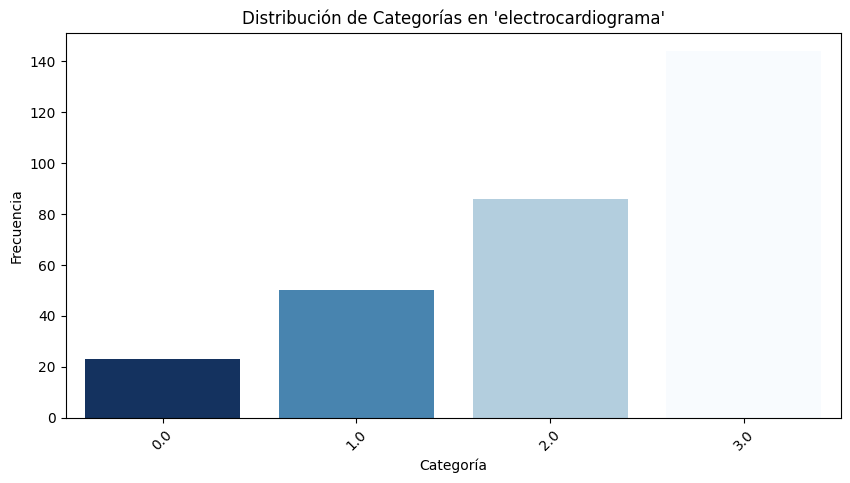

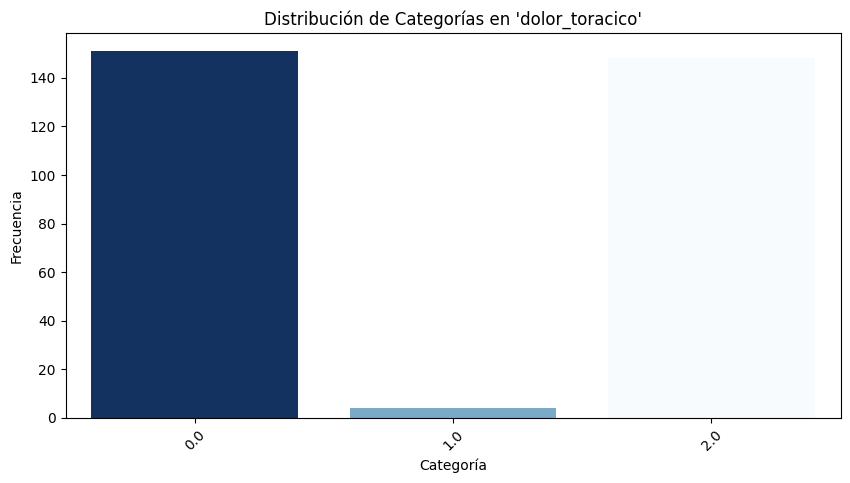

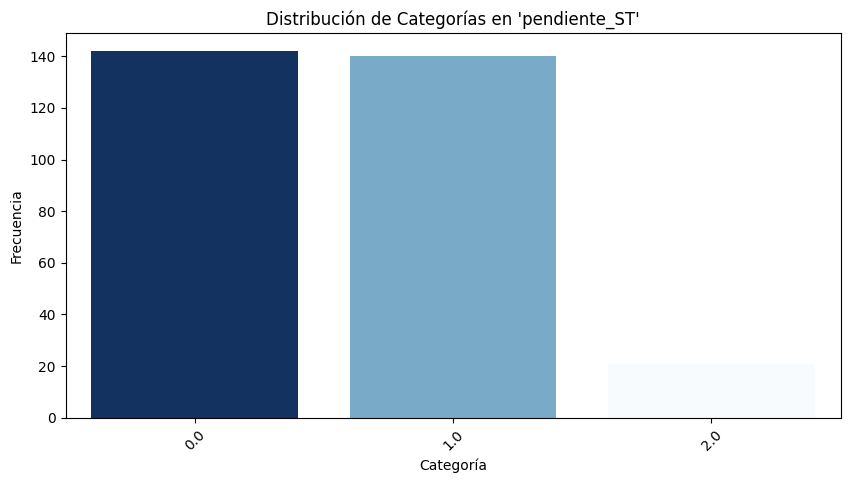

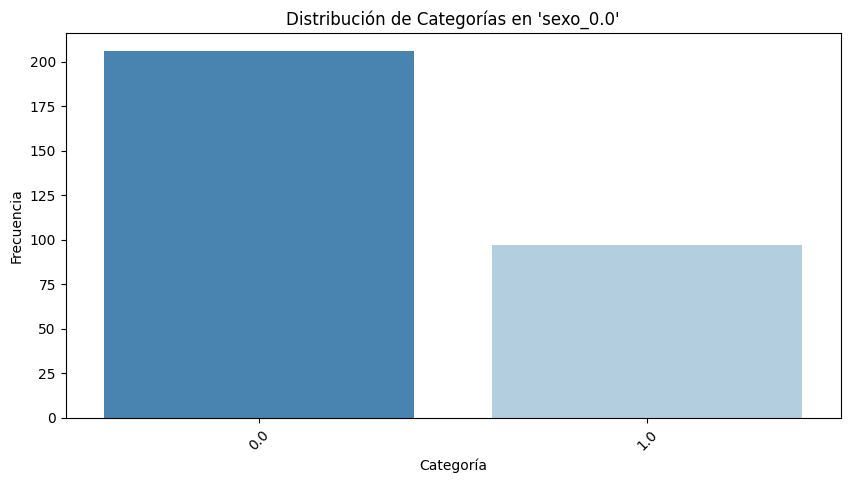

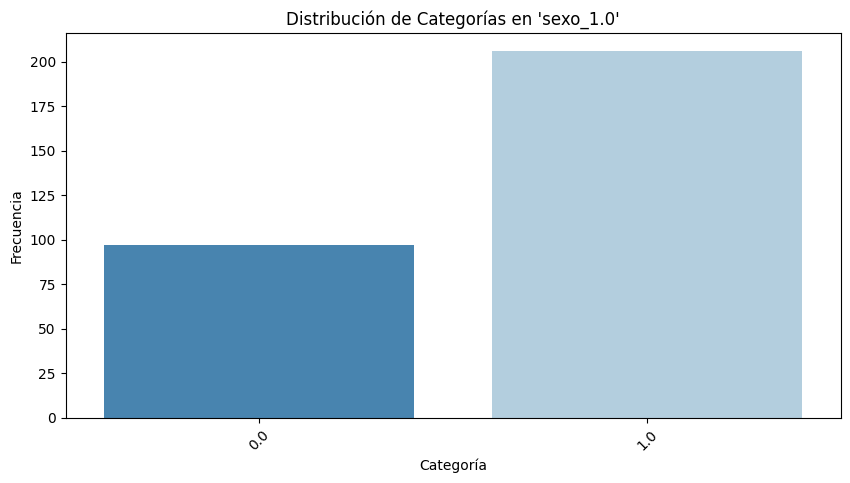

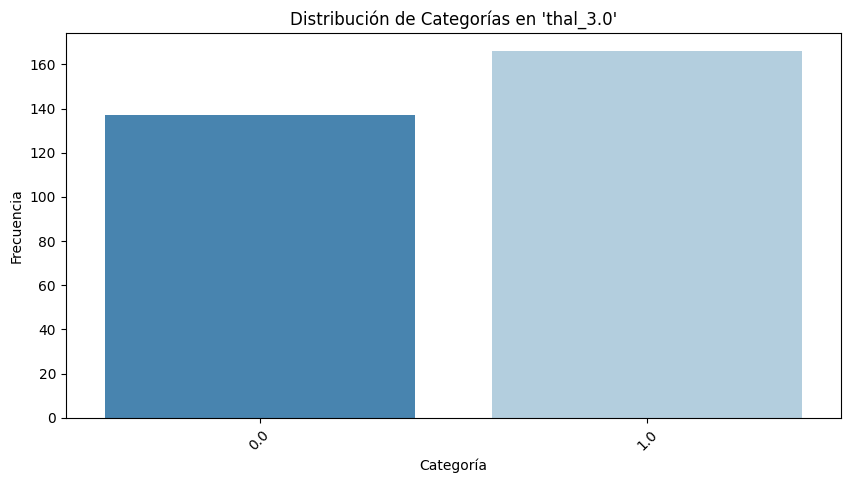

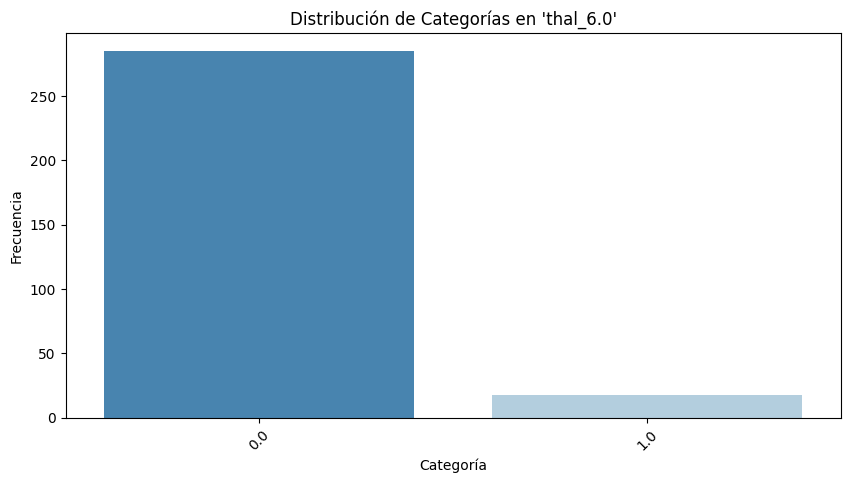

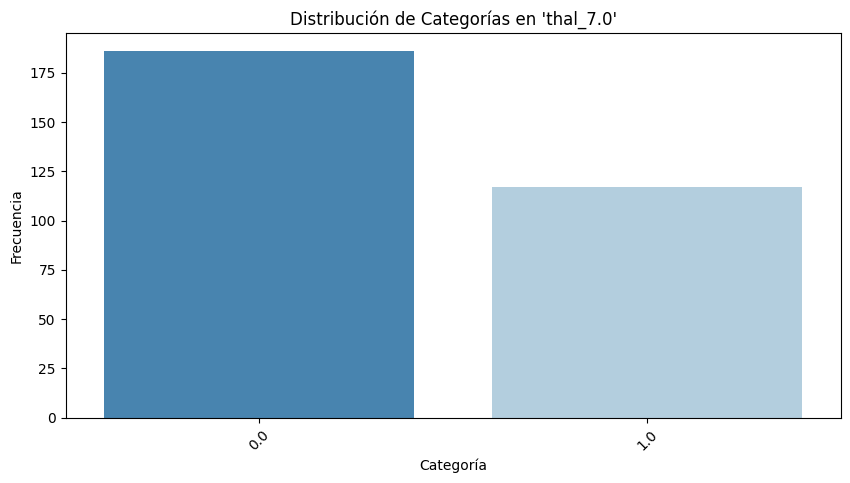

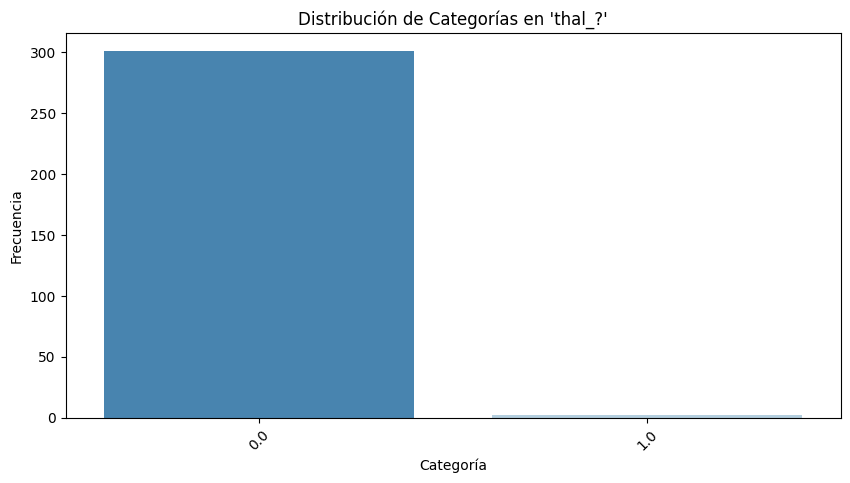

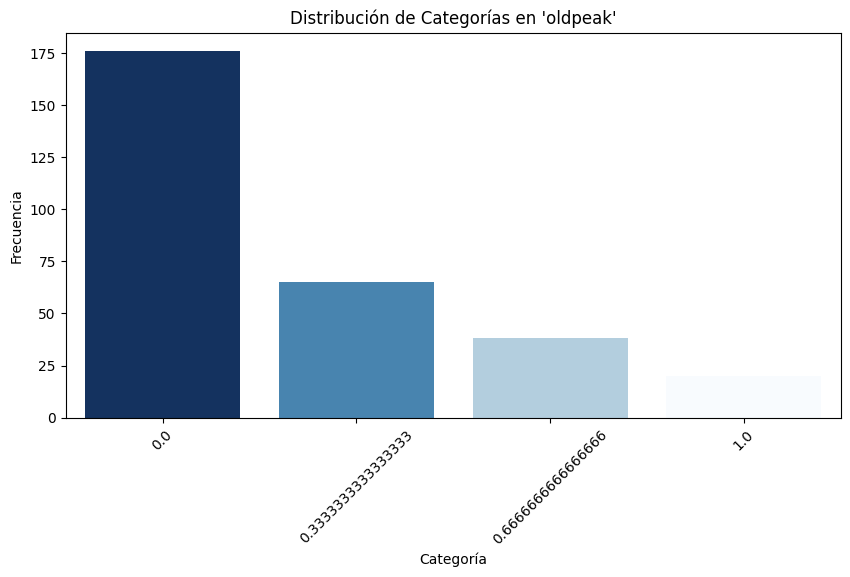

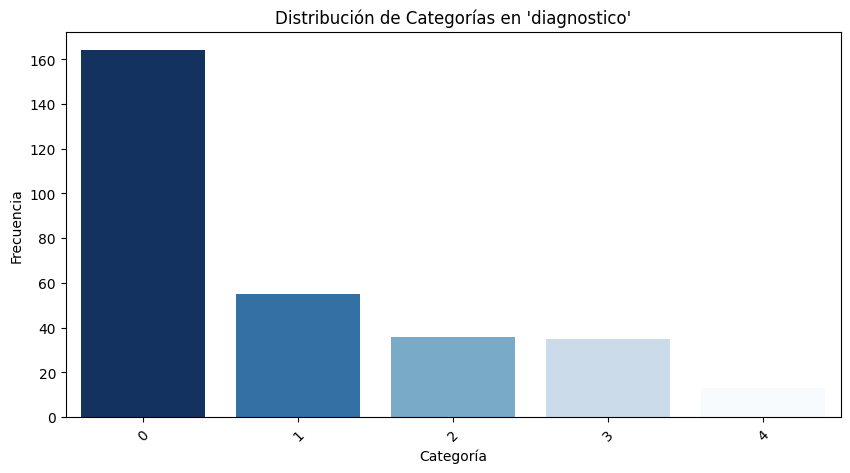

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
dataframe = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Identificar columnas categóricas
umbral_categorico = 10  # Ajusta según tu dataset
columnas_categoricas = [col for col in dataframe.columns if dataframe[col].nunique() <= umbral_categorico]

# Crear gráficos de frecuencia para cada columna categórica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 5))
    sns.barplot(
    x=dataframe[columna].value_counts().index,
    y=dataframe[columna].value_counts().values,
    hue=dataframe[columna].value_counts().index,  # Se asigna `hue`
    palette="Blues_r",
    legend=False  # Se desactiva la leyenda para evitar conflictos
)
    
    plt.title(f"Distribución de Categorías en '{columna}'")
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

# Transformación de Variables Categóricas en el Dataset Heart Disease

En el dataset de Heart Disease, existen varias variables categóricas nominales que deben transformarse en variables binarias para su uso en modelos de aprendizaje automático. La transformación sigue un proceso similar al ejemplo que mencionaste, adaptado a las características de este dataset.

## Variables Categóricas Nominales

Las variables categóricas nominales que requieren transformación son:

- **sexo** → Tiene 2 categorías (0 = femenino, 1 = masculino), lo que dará lugar a 1 variable binaria tras la codificación.
- **thal** → Tiene 3 categorías (3 = normal, 6 = defecto fijo, 7 = defecto reversible), lo que generará 3 variables binarias tras la transformación.

## Proceso de Transformación

Cada categoría única de las variables categóricas se convertirá en una columna binaria (0 o 1) mediante *one-hot encoding*.

### Ejemplo para `thal`:
- `thal_3` → Indica si el paciente tiene un resultado "normal".
- `thal_6` → Indica si el paciente tiene un "defecto fijo".
- `thal_7` → Indica si el paciente tiene un "defecto reversible".

### Ejemplo para `sexo`:
- `sexo_1` → Indica si el paciente es masculino.

## Cantidad de Variables Binarias Generadas

- Para `sexo`: 1 variable binaria.
- Para `thal`: 3 variables binarias.
- **Total de variables binarias generadas: 4.**

## Cálculo de la Transformación

- Variables originales: 13 (sin contar la columna objetivo `diagnostico`).
- Variables categóricas eliminadas: 2 (`sexo`, `thal`).
- Variables binarias agregadas: 4 (`sexo_1`, `thal_3`, `thal_6`, `thal_7`).

**Resultado final:**  
`13 - 2 + 4 = 15` variables finales después de la transformación.

Luego de la transformación, el dataframe tendrá 15 variables, preparadas para ser utilizadas en modelos de aprendizaje automático.


<div id="diseño-transformadores" style="color:#106ba3"><h3>Diseño de transformadores</h3> </div>

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables. Para una mejor organización creamos los preprocesadores y sus métodos de transformación.

In [ ]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

<div id="diseño-pipeline" style="color:#106ba3"><h3>Diseño de pipeline</h3> </div>

El procesador 'prepcn' es indispensable que se aplique antes de los demás preprocesadores numéricos. En el Pipeline "pipe" se aplica primeramente la tansformación de variables categóricas a variables numéricas y en segundo lugar se aplica la transformación numérica. 

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Definición del transformador para columnas categóricas ordinales
ordinal_encoder = OrdinalEncoder()

# Definición del transformador para columnas categóricas nominales
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Definición del transformador para columnas numéricas (por ejemplo, MinMaxScaler)
min_max_scaler = MinMaxScaler()

# Crear el ColumnTransformer
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, categorical_ordinal_features),
        ('nom', one_hot_encoder, categorical_nominal_features),
        ('num', min_max_scaler, numeric_features)
    ]
)


In [51]:
from sklearn.neural_network import MLPClassifier
RedNeuronal = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


In [52]:
from sklearn.pipeline import Pipeline

# Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres)
])

pipeRedNeuronal = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('RN', RedNeuronal)
])


<div id="transformacion-variables" style="color:#106ba3"><h3>Transformación de variables</h3> </div>

In [53]:
import copy
import pandas as pd

# Copiar el dataframe original antes de la transformación
dataframeTransformado = copy.deepcopy(dataframe)

# Filtrar el dataframe para asegurarnos de que solo tenga las columnas esperadas por el pipeline
columnas_requeridas = set(categorical_ordinal_features + categorical_nominal_features + numeric_features)
columnas_existentes = list(columnas_requeridas & set(dataframeTransformado.columns))
dataframeTransformado = dataframeTransformado[columnas_existentes]

print(" Dataframe filtrado correctamente con las columnas esperadas.")
print(" Columnas finales antes de fit_transform():")
print(dataframeTransformado.columns)

# Asegurar que todas las columnas numéricas sean realmente numéricas antes de aplicar fit_transform()
for col in numeric_features:
    if col in dataframeTransformado.columns:
        dataframeTransformado[col] = pd.to_numeric(dataframeTransformado[col], errors='coerce')

print("Conversión de datos numéricos realizada.")

# Aplicar transformación del pipeline
X_Transformado = pipe.fit_transform(dataframeTransformado)

print("Pipeline aplicado correctamente.")

# Obtener los nombres de las nuevas columnas
cnamesDataset1 = []

# Agregar nombres de variables ordinales categóricas
if len(categorical_ordinal_features) != 0:
    cnamesDataset1.extend(list(set(categorical_ordinal_features) & set(dataframeTransformado.columns)))

# Agregar nombres de variables nominales categóricas transformadas con OneHotEncoder
if len(categorical_nominal_features) != 0:
    # Obtener el objeto OneHotEncoder directamente
    onehot_encoder = pipe.named_steps['prepcn'].transformers_[1][1]

    # Obtener nombres de las columnas desde OneHotEncoder sin especificar las características manualmente
    cnamesDataset2 = onehot_encoder.get_feature_names_out()

    # Agregar nombres de variables transformadas
    cnamesDataset1.extend(cnamesDataset2)

# Agregar nombres de variables numéricas
cnamesDataset1.extend(list(set(numeric_features) & set(dataframeTransformado.columns)))

print("Lista de variables generadas correctamente:")
print(cnamesDataset1)

# Convertir X_Transformado nuevamente en un DataFrame con los nombres correctos
dataframeTransformado = pd.DataFrame(data=X_Transformado, columns=cnamesDataset1)

# Guardar el dataset sin etiquetas como CSV
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";", index=False)
print(" Dataset sin etiquetas guardado correctamente.")

# Agregar la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis=1)

# Guardar el dataset con etiquetas como CSV
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";", index=False)
print(" Dataset con etiquetas guardado correctamente.")

# Mostrar las primeras filas del dataframe
print(" Primeras filas del DataFrame después de la transformación:")
print(dataframeTransformado.head())

 Dataframe filtrado correctamente con las columnas esperadas.
 Columnas finales antes de fit_transform():
Index(['electrocardiograma', 'dolor_toracico', 'frecuencia_cardiaca_maxima',
       'pendiente_ST', 'cantidad_vasos', 'sexo', 'presion_arterial', 'thal',
       'colesterol', 'edad', 'oldpeak'],
      dtype='object')
Conversión de datos numéricos realizada.
Pipeline aplicado correctamente.
Lista de variables generadas correctamente:
['electrocardiograma', 'dolor_toracico', 'pendiente_ST', 'sexo_0.0', 'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?', 'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial', 'colesterol', 'edad', 'oldpeak']
 Dataset sin etiquetas guardado correctamente.
 Dataset con etiquetas guardado correctamente.
 Primeras filas del DataFrame después de la transformación:
   electrocardiograma  dolor_toracico  pendiente_ST  sexo_0.0  sexo_1.0  \
0                 0.0             2.0           2.0       0.0       1.0   
1                 3.0      

In [54]:
import pickle
from sklearn import set_config

# Función para guardar un Pipeline o Modelo
def guardarPipeline(pipeline, nombreArchivo):
    with open(nombreArchivo + '.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f" Pipeline guardado correctamente en {nombreArchivo}.pickle")

# Función para cargar un Pipeline o Modelo
def cargarPipeline(nombreArchivo):
    try:
        with open(nombreArchivo + '.pickle', 'rb') as handle:
            pipeline = pickle.load(handle)
        print(f" Pipeline cargado correctamente desde {nombreArchivo}.pickle")
        return pipeline
    except FileNotFoundError:
        print(f" Error: Archivo {nombreArchivo}.pickle no encontrado.")
        return None
    except Exception as e:
        print(f" Error al cargar el pipeline: {e}")
        return None

# Guardar el pipeline actual
guardarPipeline(pipe, 'pipePreprocesadores')

# Limpiar la variable antes de cargar
pipe = None  

# Cargar el pipeline guardado
pipe = cargarPipeline('pipePreprocesadores')

# Configuración para visualizar el pipeline
set_config(display='diagram')
pipe

 Pipeline guardado correctamente en pipePreprocesadores.pickle
 Pipeline cargado correctamente desde pipePreprocesadores.pickle


Pipeline(steps=[('prepcn',
                 ColumnTransformer(transformers=[('ord', OrdinalEncoder(),
                                                  ['dolor_toracico',
                                                   'electrocardiograma',
                                                   'pendiente_ST']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sexo', 'thal']),
                                                 ('num', MinMaxScaler(),
                                                  ['edad', 'colesterol',
                                                   'presion_arterial',
                                                   'frecuencia_cardiaca_maxima',
                                                   'oldpeak',
                                                   'cantidad_vasos'])]))])

<div id="analisis-correlacion" style="color:#106ba3"><h3>Análisis de correlación</h3> </div>

En esta subsección se realiza un mapa de calor de las correlaciones entre todas las variables para identificar las variables más relevantes e influyentes a la variable de salida.

In [55]:
dfCorrel=copy.deepcopy(dataframeTransformado)
dfCorrel=dfCorrel.corr()
dfCorrel.head()

,electrocardiograma,dolor_toracico,pendiente_ST,sexo_0.0,sexo_1.0,thal_3.0,thal_6.0,thal_7.0,thal_?,frecuencia_cardiaca_maxima,cantidad_vasos,presion_arterial,colesterol,edad,oldpeak,diagnostico
electrocardiograma,1.000000,0.067505,0.152050,-0.010084,0.010084,-0.264936,0.045860,0.243738,0.029048,0.104139,0.072319,-0.036077,-0.334422,0.202277,0.233214,0.407075
dolor_toracico,0.067505,1.000000,0.133946,-0.021647,0.021647,-0.029082,0.044672,0.007905,0.000812,0.148868,0.171043,0.146560,-0.083389,0.114133,0.128343,0.183696
pendiente_ST,0.152050,0.133946,1.000000,-0.037533,0.037533,-0.298671,0.185825,0.217318,-0.013337,0.161770,-0.004062,0.117382,-0.385601,0.577537,0.110119,0.377957
sexo_0.0,-0.010084,-0.021647,-0.037533,1.000000,-1.000000,0.381754,-0.142524,-0.326284,0.031427,0.097542,0.199915,0.064456,0.048663,-0.102173,-0.093185,-0.224469
sexo_1.0,0.010084,0.021647,0.037533,-1.000000,1.000000,-0.381754,0.142524,0.326284,-0.031427,-0.097542,-0.199915,-0.064456,-0.048663,0.102173,0.093185,0.224469


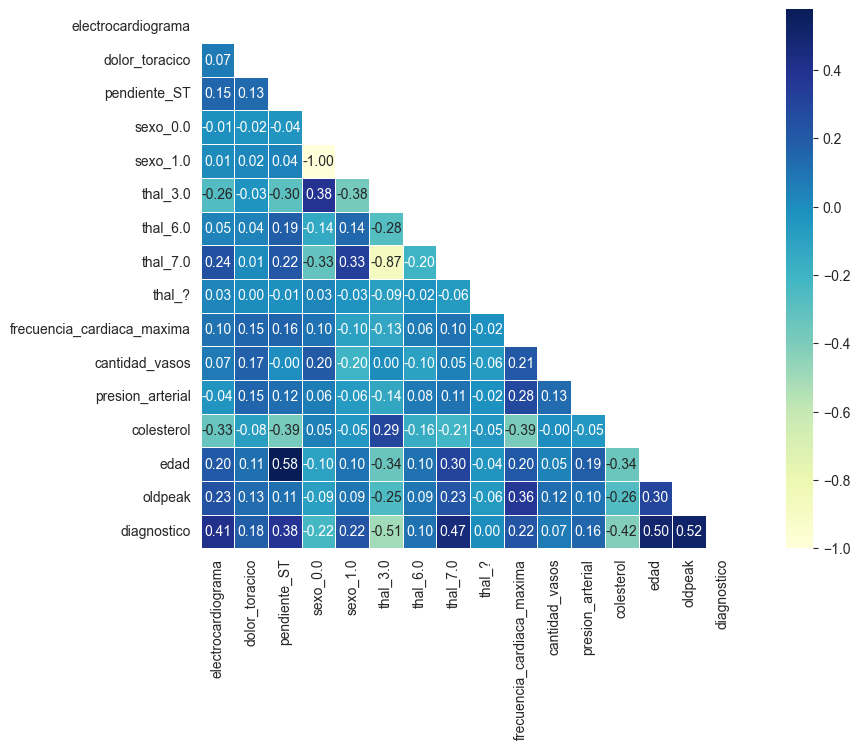

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación del dataset
dfCorrel = dataframeTransformado.corr()

# Crear una máscara para ocultar la parte superior de la matriz
mask = np.zeros_like(dfCorrel)
mask[np.triu_indices_from(mask)] = True

# Configuración de visualización
plt.figure(figsize=(12, 7))
sns.set_style("white")

# Generar el mapa de calor de las correlaciones
ax = sns.heatmap(dfCorrel, mask=mask, cmap="YlGnBu", annot=True, fmt=".2f", square=True, linewidths=0.5)

# Guardar la imagen
plt.savefig('attribute_correlations.png', dpi=300)
plt.show()

In [58]:
# Ordenar las correlaciones en relación con la variable de salida
dfCorrOrdenado = dfCorrel.sort_values(by=['diagnostico'], ascending=False)

# Mostrar las 10 variables con mayor correlación positiva con la variable objetivo
dfCorrOrdenado['diagnostico'].head(10)

diagnostico                   1.000000
oldpeak                       0.518909
edad                          0.504092
thal_7.0                      0.466119
electrocardiograma            0.407075
pendiente_ST                  0.377957
sexo_1.0                      0.224469
frecuencia_cardiaca_maxima    0.222853
dolor_toracico                0.183696
presion_arterial              0.157754
Name: diagnostico, dtype: float64

In [59]:
# Ordenar las correlaciones en relación con la variable de salida (de menor a mayor)
dfCorrOrdenado = dfCorrel.sort_values(by=['diagnostico'], ascending=True)

# Mostrar las 10 variables con mayor correlación negativa con el diagnóstico
dfCorrOrdenado['diagnostico'].head(10)

thal_3.0                     -0.505998
colesterol                   -0.415040
sexo_0.0                     -0.224469
thal_?                        0.004167
cantidad_vasos                0.070909
thal_6.0                      0.103916
presion_arterial              0.157754
dolor_toracico                0.183696
frecuencia_cardiaca_maxima    0.222853
sexo_1.0                      0.224469
Name: diagnostico, dtype: float64

<div id="seleccion-extraccion-variables" style="color:#106ba3"><h3>Selección y extracción de variables</h3> </div>

Se seleccionan las variables con mayor correlación. También se podría omitir este paso y continuar con todas las variables.

In [60]:
# Mostrar todas las columnas disponibles en dataframeTransformado
print("🔍 Columnas disponibles en dataframeTransformado:")
print(dataframeTransformado.columns)

# Definir las variables transformadas con OneHotEncoder
sexo_encoded = [col for col in dataframeTransformado.columns if "sexo" in col]
thal_encoded = [col for col in dataframeTransformado.columns if "thal" in col]

# Extraer las variables relevantes del dataset transformado
columnas_extraccion = ['edad', 'dolor_toracico', 'presion_arterial', 
                        'colesterol', 'frecuencia_cardiaca_maxima', 'oldpeak', 
                        'pendiente_ST', 'cantidad_vasos', 'diagnostico']

# Agregar las versiones transformadas de `sexo` y `thal`
columnas_extraccion.extend(sexo_encoded)
columnas_extraccion.extend(thal_encoded)

# Crear el nuevo dataframe con las variables corregidas
dataframeExtraccion = dataframeTransformado[columnas_extraccion]

# Mostrar la forma del dataset extraído
print("Dimensiones del nuevo dataframe:", dataframeExtraccion.shape)

# Mostrar las primeras filas del nuevo dataframe
dataframeExtraccion.head()

🔍 Columnas disponibles en dataframeTransformado:
Index(['electrocardiograma', 'dolor_toracico', 'pendiente_ST', 'sexo_0.0',
       'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?',
       'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial',
       'colesterol', 'edad', 'oldpeak', 'diagnostico'],
      dtype='object')
Dimensiones del nuevo dataframe: (303, 15)


,edad,dolor_toracico,presion_arterial,colesterol,frecuencia_cardiaca_maxima,oldpeak,pendiente_ST,cantidad_vasos,diagnostico,sexo_0.0,sexo_1.0,thal_3.0,thal_6.0,thal_7.0,thal_?
0,0.370968,2.0,0.481132,0.603053,0.708333,0.000000,2.0,0.244292,0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.241935,2.0,0.622642,0.282443,0.791667,1.000000,1.0,0.365297,2,0.0,1.0,1.0,0.0,0.0,0.0
2,0.419355,2.0,0.245283,0.442748,0.791667,0.666667,1.0,0.235160,1,0.0,1.0,0.0,0.0,1.0,0.0
3,0.564516,0.0,0.339623,0.885496,0.166667,0.000000,2.0,0.283105,0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.225806,2.0,0.339623,0.770992,0.250000,0.000000,0.0,0.178082,0,1.0,0.0,1.0,0.0,0.0,0.0


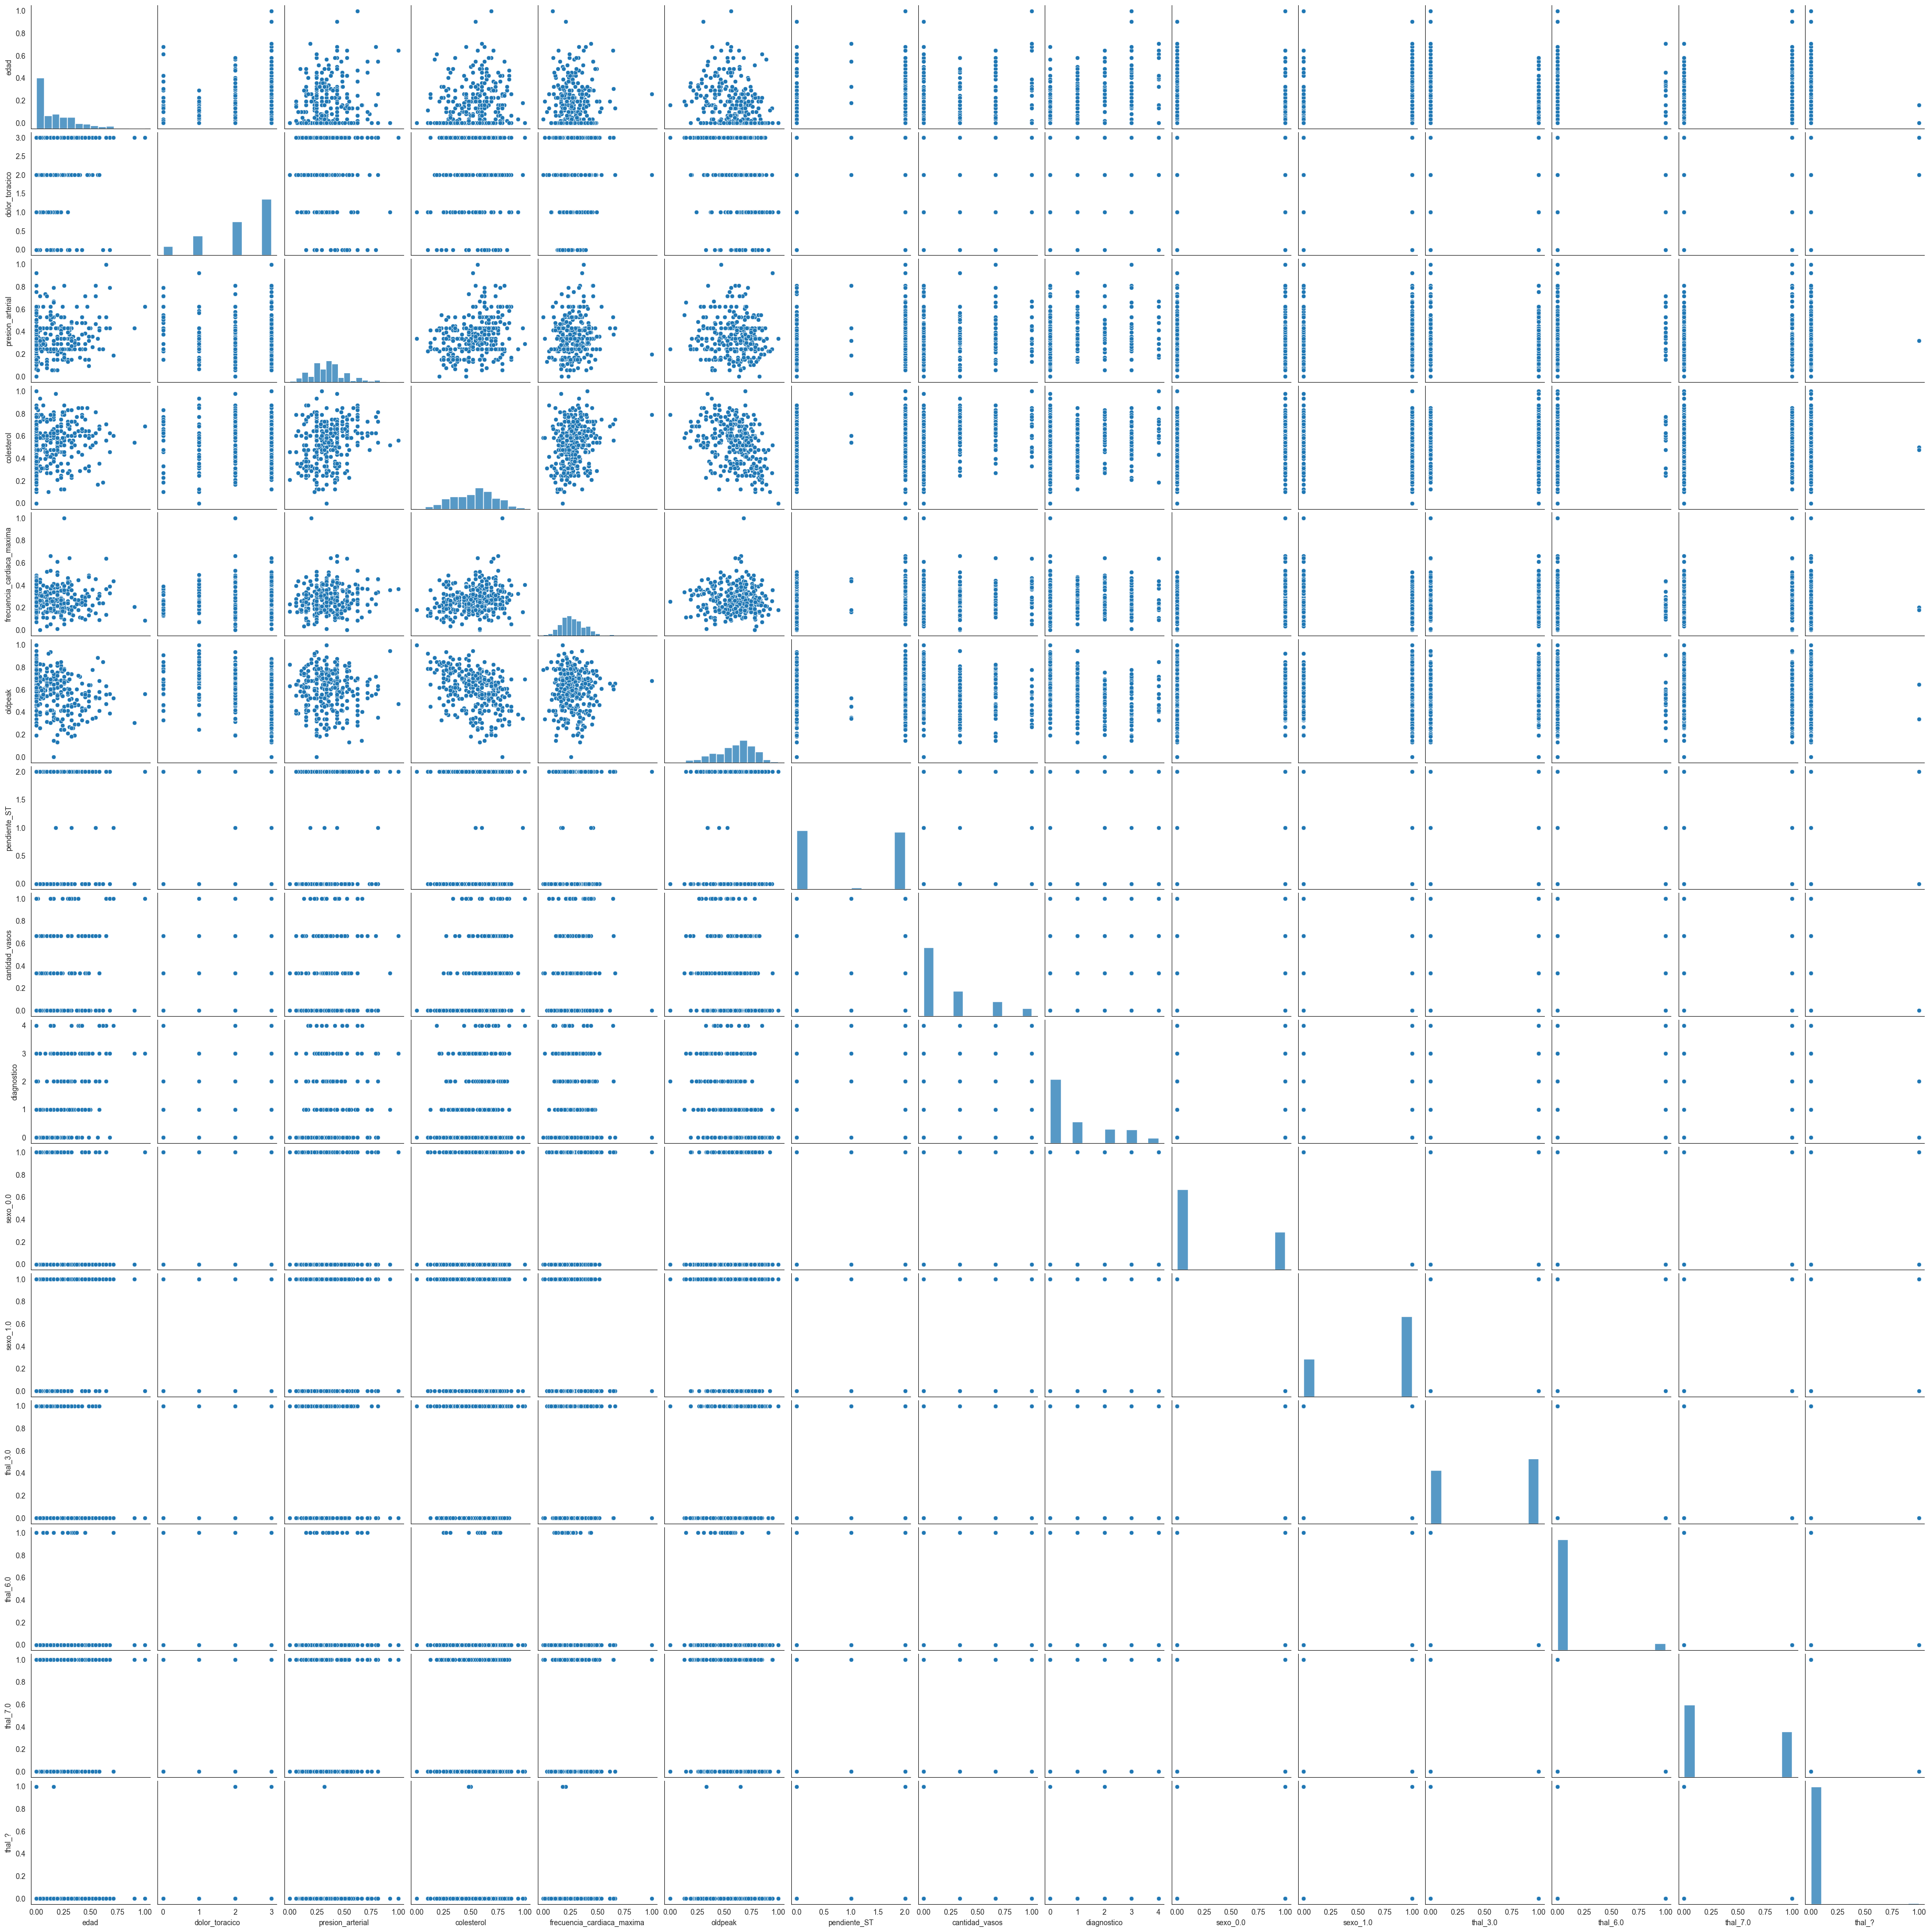

In [29]:
#Generar todas las figuras de correlaciones entre cada par de variables
sns.pairplot(dataframeExtraccion)
plt.show()

<div id="transformacion-numerica-adicional" style="color:#106ba3"><h3>Transformación numérica adicional: Min max scaling</h3> </div>

In [62]:
# Verificar todas las columnas disponibles en dataframeTransformado
print("🔍 Columnas en dataframeTransformado:")
print(dataframeTransformado.columns)

# Asegurar que 'diagnostico' existe y agregarlo a dataframeExtraccion
if 'diagnostico' in dataframeTransformado.columns:
    dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']
    print("'diagnostico' agregado correctamente a dataframeExtraccion.")
else:
    print("Error: 'diagnostico' no está en dataframeTransformado. Verifica el nombre correcto.")

# Mostrar la forma actualizada de dataframeExtraccion
print(" Dimensiones del dataframeExtraccion actualizado:", dataframeExtraccion.shape)

# Mostrar las primeras filas para verificar
dataframeExtraccion.head()

🔍 Columnas en dataframeTransformado:
Index(['electrocardiograma', 'dolor_toracico', 'pendiente_ST', 'sexo_0.0',
       'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?',
       'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial',
       'colesterol', 'edad', 'oldpeak', 'diagnostico'],
      dtype='object')
'diagnostico' agregado correctamente a dataframeExtraccion.
 Dimensiones del dataframeExtraccion actualizado: (303, 15)


C:\Users\mlata\AppData\Local\Temp\ipykernel_26236\1095670375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']


,edad,dolor_toracico,presion_arterial,colesterol,frecuencia_cardiaca_maxima,oldpeak,pendiente_ST,cantidad_vasos,diagnostico,sexo_0.0,sexo_1.0,thal_3.0,thal_6.0,thal_7.0,thal_?
0,0.370968,2.0,0.481132,0.603053,0.708333,0.000000,2.0,0.244292,0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.241935,2.0,0.622642,0.282443,0.791667,1.000000,1.0,0.365297,2,0.0,1.0,1.0,0.0,0.0,0.0
2,0.419355,2.0,0.245283,0.442748,0.791667,0.666667,1.0,0.235160,1,0.0,1.0,0.0,0.0,1.0,0.0
3,0.564516,0.0,0.339623,0.885496,0.166667,0.000000,2.0,0.283105,0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.225806,2.0,0.339623,0.770992,0.250000,0.000000,0.0,0.178082,0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
from sklearn import preprocessing
dataframeExtraccion = dataframeExtraccion.drop(['diagnostico'], axis=1)


data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(dataframeExtraccion)
print("\n Datos normalizados con escala Min Max:\n")
DataframeTransformado1 = pd.DataFrame(data=data_scaled_minmax, columns=dataframeExtraccion.columns)
DataframeTransformado1 = pd.concat([DataframeTransformado1, dataframeTransformado[['diagnostico']]], axis=1)
DataframeTransformado1.to_csv("DatasetHeartDiseaseTransformadoMinMax.csv", sep=";", index=False)
DataframeTransformado1.head()


 Datos normalizados con escala Min Max:



,edad,dolor_toracico,presion_arterial,colesterol,frecuencia_cardiaca_maxima,oldpeak,pendiente_ST,cantidad_vasos,sexo_0.0,sexo_1.0,thal_3.0,thal_6.0,thal_7.0,thal_?,diagnostico
0,0.370968,1.0,0.481132,0.603053,0.708333,0.000000,1.0,0.244292,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.241935,1.0,0.622642,0.282443,0.791667,1.000000,0.5,0.365297,0.0,1.0,1.0,0.0,0.0,0.0,2
2,0.419355,1.0,0.245283,0.442748,0.791667,0.666667,0.5,0.235160,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.564516,0.0,0.339623,0.885496,0.166667,0.000000,1.0,0.283105,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.225806,1.0,0.339623,0.770992,0.250000,0.000000,0.0,0.178082,1.0,0.0,1.0,0.0,0.0,0.0,0


<div style="color:#106ba3"><h3>Transformación numérica adicional: Normalización L1 y L2</h3> </div>

In [64]:
# Manejo de valores NaN antes de la normalización
dataframeExtraccion = dataframeExtraccion.fillna(0)  # Reemplaza NaN con 0
# Alternativa: dataframeExtraccion = dataframeExtraccion.dropna()  # Elimina filas con NaN

# Aplicar normalización L1 y L2 después de asegurarse que no hay valores NaN
data_normalized_l1 = preprocessing.normalize(dataframeExtraccion, norm='l1')
data_normalized_l2 = preprocessing.normalize(dataframeExtraccion, norm='l2')

print("\n Datos normalizados con L1 y L2 sin NaN:\n")


 Datos normalizados con L1 y L2 sin NaN:



In [65]:
from sklearn import preprocessing
import pandas as pd

# Verificar que 'diagnostico' está en dataframeTransformado y agregarlo a dataframeExtraccion si falta
if 'diagnostico' not in dataframeExtraccion.columns:
    dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']
    print(" 'diagnostico' agregado correctamente a dataframeExtraccion.")

# Separar la variable objetivo antes de la normalización
diagnostico_column = dataframeExtraccion[['diagnostico']]
dataframeExtraccion = dataframeExtraccion.drop(['diagnostico'], axis=1)

# Normalización L1: la suma de los valores absolutos es igual a 1
data_normalized_l1 = preprocessing.normalize(dataframeExtraccion, norm='l1')

# Normalización L2: la suma de los cuadrados es igual a 1
data_normalized_l2 = preprocessing.normalize(dataframeExtraccion, norm='l2')

print("\n Datos normalizados con L1 y L2:\n")

# Crear DataFrame con datos normalizados L1
DataframeTransformado2 = pd.DataFrame(data=data_normalized_l1, columns=dataframeExtraccion.columns)

# Agregar la variable objetivo nuevamente
DataframeTransformado2 = pd.concat([DataframeTransformado2, diagnostico_column], axis=1)

# Guardar el dataset con normalización L1
DataframeTransformado2.to_csv("DatasetHeartDiseaseTransformadoNormL1.csv", sep=";", index=False)
print(" Dataset con normalización L1 guardado correctamente.")

# Mostrar las primeras filas del dataset transformado con L1
print(DataframeTransformado2.head())

# Crear DataFrame con datos normalizados L2
DataframeTransformado3 = pd.DataFrame(data=data_normalized_l2, columns=dataframeExtraccion.columns)

# Agregar la variable objetivo nuevamente
DataframeTransformado3 = pd.concat([DataframeTransformado3, diagnostico_column], axis=1)

# Guardar el dataset con normalización L2
DataframeTransformado3.to_csv("DatasetHeartDiseaseTransformadoNormL2.csv", sep=";", index=False)
print(" Dataset con normalización L2 guardado correctamente.")

# Mostrar las primeras filas del dataset transformado con L2
print(DataframeTransformado3.head())

 'diagnostico' agregado correctamente a dataframeExtraccion.

 Datos normalizados con L1 y L2:

 Dataset con normalización L1 guardado correctamente.
       edad  dolor_toracico  presion_arterial  colesterol  \
0  0.044122        0.237875          0.057225    0.071726   
1  0.029135        0.240848          0.074981    0.034013   
2  0.053757        0.256381          0.031443    0.056756   
3  0.090476        0.000000          0.054432    0.141920   
4  0.039172        0.346951          0.058916    0.133748   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.084247  0.000000      0.237875        0.029056   
1                    0.095336  0.120424      0.120424        0.043991   
2                    0.101484  0.085460      0.128191        0.030145   
3                    0.026712  0.000000      0.320543        0.045374   
4                    0.043369  0.000000      0.000000        0.030893   

   sexo_0.0  sexo_1.0  thal_3.0  thal_6.0  t

<div style="color:#106ba3"><h3>Transformación numérica adicional: Estandarización</h3> </div>

In [66]:
from sklearn import preprocessing
import pandas as pd

# Verificar que 'diagnostico' está en dataframeTransformado y agregarlo a dataframeExtraccion si falta
if 'diagnostico' not in dataframeExtraccion.columns:
    dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']
    print(" 'diagnostico' agregado correctamente a dataframeExtraccion.")

# Separar la variable objetivo antes de la estandarización
diagnostico_column = dataframeExtraccion[['diagnostico']]
dataframeExtraccion = dataframeExtraccion.drop(['diagnostico'], axis=1)

# Aplicar estandarización con `scale()`
XEstandarizado = preprocessing.scale(dataframeExtraccion)

print("\n Datos estandarizados correctamente:\n")

# Crear DataFrame con datos estandarizados
DataframeTransformado4 = pd.DataFrame(data=XEstandarizado, columns=dataframeExtraccion.columns)

# Agregar la variable objetivo nuevamente
DataframeTransformado4 = pd.concat([DataframeTransformado4, diagnostico_column], axis=1)

# Guardar el dataset transformado en un archivo CSV
DataframeTransformado4.to_csv("DatasetHeartDiseaseTransformadoScale.csv", sep=";", index=False)
print(" Dataset con estandarización guardado correctamente.")

# Mostrar las primeras filas del dataset transformado
print(DataframeTransformado4.head())

 'diagnostico' agregado correctamente a dataframeExtraccion.

 Datos estandarizados correctamente:

 Dataset con estandarización guardado correctamente.
       edad  dolor_toracico  presion_arterial  colesterol  \
0  1.087338        1.016684          0.757525    0.017197   
1  0.397182        1.016684          1.611220   -1.821905   
2  1.346147        1.016684         -0.665300   -0.902354   
3  2.122573       -0.996749         -0.096170    1.637359   
4  0.310912        1.016684         -0.096170    0.980537   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.948726 -0.711131      2.274579       -0.264900   
1                    1.392002  2.504881      0.649113        0.760415   
2                    1.392002  1.432877      0.649113       -0.342283   
3                   -1.932564 -0.711131      2.274579        0.063974   
4                   -1.489288 -0.711131     -0.976352       -0.825922   

   sexo_0.0  sexo_1.0  thal_3.0  thal_6.0

<div id="Transformacion-nuevos-samples" style="color:#106ba3"><h3>Transformación de nuevos samples</h3> </div>

La siguiente función permite transformar las variables de un nuevo cliente a un formato numérico. En la función se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y los nombres de las variables. Luego, se aplica la transformación de variables mediante el Pipeline. 

In [67]:
import pandas as pd

def preprocesarNuevoPaciente(edad=67, sexo=1, dolor_toracico=3, presion_arterial=130, colesterol=250, 
                             azucar_sangre=0, electrocardiograma=1, frecuencia_cardiaca_maxima=160, 
                             oldpeak=1.5, pendiente_ST=2, cantidad_vasos=1, thal=3):   

    # Convertir las variables categóricas a string
    sexo = str(sexo)
    thal = str(thal)

    # Nombres de columnas
    cnames = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
              'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
              'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal']

    # Crear el DataFrame del nuevo paciente
    Xnew = [[edad, sexo, dolor_toracico, presion_arterial, colesterol, 
             azucar_sangre, electrocardiograma, frecuencia_cardiaca_maxima, 
             oldpeak, pendiente_ST, cantidad_vasos, thal]]

    Xnew_Dataframe = pd.DataFrame(data=Xnew, columns=cnames)

    # Mostrar la información antes de aplicar el pipeline
    print("\n DataFrame antes del preprocesamiento:\n")
    display(Xnew_Dataframe)  # Usa display() en Jupyter para forzar la salida

    # Transformar con el pipeline
    Xnew_Preprocesado = pipe.transform(Xnew_Dataframe)

    # Mostrar la información preprocesada
    print("\n Resultado preprocesado (array):\n", Xnew_Preprocesado)

    return Xnew_Preprocesado

# Aplicar la función de preprocesamiento
Xnew_Preprocesado = preprocesarNuevoPaciente()


 DataFrame antes del preprocesamiento:



,edad,sexo,dolor_toracico,presion_arterial,colesterol,azucar_sangre,electrocardiograma,frecuencia_cardiaca_maxima,oldpeak,pendiente_ST,cantidad_vasos,thal
0,67,1,3,130,250,0,1,160,1.5,2,1,3



 Resultado preprocesado (array):
 [[2 1 1 0 0 0 0 0 0 1 0 0 1 0 0]]


<div id="clasificacion-knn" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 2: Clasificación con el algoritmo KNN, evaluación y optimización</h2> </div>

A partir de la carga del dataset transformado se proceder con la fase de clasificación. Para ello, se debe indicar el csv deseado.

In [68]:
import pandas as pd

# Cargar el dataset transformado con etiquetas
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Reemplazar valores en la variable objetivo
dataframeTransformado['diagnostico'] = dataframeTransformado['diagnostico'].replace(2, 0)

# Mostrar dimensiones del dataframe
print("\n Dimensiones del dataset transformado:", dataframeTransformado.shape)

# Mostrar las primeras filas del dataset
print("\n Primeras filas del dataset transformado:\n")
print(dataframeTransformado.head())


 Dimensiones del dataset transformado: (303, 16)

 Primeras filas del dataset transformado:

   electrocardiograma  dolor_toracico  pendiente_ST  sexo_0.0  sexo_1.0  \
0                 0.0             2.0           2.0       0.0       1.0   
1                 3.0             2.0           1.0       0.0       1.0   
2                 3.0             2.0           1.0       0.0       1.0   
3                 2.0             0.0           2.0       0.0       1.0   
4                 1.0             2.0           0.0       1.0       0.0   

   thal_3.0  thal_6.0  thal_7.0  thal_?  frecuencia_cardiaca_maxima  \
0       0.0       1.0       0.0     0.0                    0.708333   
1       1.0       0.0       0.0     0.0                    0.791667   
2       0.0       0.0       1.0     0.0                    0.791667   
3       1.0       0.0       0.0     0.0                    0.166667   
4       1.0       0.0       0.0     0.0                    0.250000   

   cantidad_vasos  presion_a

In [67]:
import pickle
import pandas as pd

# Función para guardar un modelo
def guardarModelo(pipeline, nombreArchivo):
    with open(nombreArchivo + '.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print(" Modelo guardado correctamente en", nombreArchivo + '.pickle')

# Función para transformar la predicción
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio = lista[i]
        if desempenio < 0.5:
            desempenio = 0
        else:
            desempenio = 1
        lista[i] = desempenio
    return lista

# Cargar el dataset transformado con etiquetas
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Separar la variable objetivo
Y = dataframeTransformado['diagnostico']
dataframeTransformado = dataframeTransformado.drop(['diagnostico'], axis=1)

# Convertir los datos en formato NumPy
X_Transformado = dataframeTransformado.values

# Mostrar la forma del dataset transformado
print("\n Dimensiones de X_Transformado:", X_Transformado.shape)

# Mostrar las primeras filas de los datos transformados
print("\n Primeros valores de X_Transformado:\n", X_Transformado[:5])


 Dimensiones de X_Transformado: (303, 15)

 Primeros valores de X_Transformado:
 [[0.         2.         2.         0.         1.         0.
  1.         0.         0.         0.70833333 0.24429224 0.48113208
  0.60305344 0.37096774 0.        ]
 [3.         2.         1.         0.         1.         1.
  0.         0.         0.         0.79166667 0.3652968  0.62264151
  0.28244275 0.24193548 1.        ]
 [3.         2.         1.         0.         1.         0.
  0.         1.         0.         0.79166667 0.23515982 0.24528302
  0.44274809 0.41935484 0.66666667]
 [2.         0.         2.         0.         1.         1.
  0.         0.         0.         0.16666667 0.28310502 0.33962264
  0.88549618 0.56451613 0.        ]
 [1.         2.         0.         1.         0.         1.
  0.         0.         0.         0.25       0.17808219 0.33962264
  0.77099237 0.22580645 0.        ]]


In [51]:
import pandas as pd

# Cargar el dataset
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Limpiar nombres de columnas (muy importante)
dataframeTransformado.columns = dataframeTransformado.columns.str.strip().str.lower()

# Mostrar nombres de columnas para verificar
print("Columnas actuales:", dataframeTransformado.columns.tolist())

# Asegurar que 'diagnostico' esté presente
if 'diagnostico' in dataframeTransformado.columns:
    dataframeTransformado['diagnostico'] = dataframeTransformado['diagnostico'].replace(2, 0)
else:
    print("❌ La columna 'diagnostico' no fue encontrada.")

# Mostrar dimensiones y datos
print("\nDimensiones del dataset transformado:", dataframeTransformado.shape)
print("\nPrimeras filas del dataset transformado:\n")
print(dataframeTransformado.head())


Columnas actuales: ['electrocardiograma', 'dolor_toracico', 'pendiente_st', 'sexo_0.0', 'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?', 'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial', 'colesterol', 'edad', 'oldpeak', 'diagnostico']

Dimensiones del dataset transformado: (303, 16)

Primeras filas del dataset transformado:

   electrocardiograma  dolor_toracico  pendiente_st  sexo_0.0  sexo_1.0  \
0                 0.0             2.0           2.0       0.0       1.0   
1                 3.0             2.0           1.0       0.0       1.0   
2                 3.0             2.0           1.0       0.0       1.0   
3                 2.0             0.0           2.0       0.0       1.0   
4                 1.0             2.0           0.0       1.0       0.0   

   thal_3.0  thal_6.0  thal_7.0  thal_?  frecuencia_cardiaca_maxima  \
0       0.0       1.0       0.0     0.0                    0.708333   
1       1.0       0.0       0.0     0.0              

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Limpieza básica (ya debería estar hecha, pero por si acaso)
dataframeTransformado.columns = dataframeTransformado.columns.str.strip().str.lower()

# Separar X e y
X = dataframeTransformado.drop('diagnostico', axis=1)
y = dataframeTransformado['diagnostico']

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_imputado, y, test_size=0.2, random_state=42)

# Evaluación sin transformaciones
resultados_sin = []
for dist in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados_sin.append({'k': k, 'distancia': dist, 'ACC': acc})

# Crear DataFrame de resultados
df_resultados_sin = pd.DataFrame(resultados_sin)
dataResultadosSin = df_resultados_sin.groupby('distancia')
valoresK = list(range(1, 21))


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Asegurarse de que las columnas estén limpias
dataframeTransformado.columns = dataframeTransformado.columns.str.strip().str.lower()

# Separar variables predictoras y la variable objetivo
X = dataframeTransformado.drop('diagnostico', axis=1)
y = dataframeTransformado['diagnostico']

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X_imputado)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

# Evaluación del modelo KNN con distintas distancias
resultados_con = []
for dist in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados_con.append({'k': k, 'distancia': dist, 'ACC': acc})

# Crear DataFrame de resultados con transformaciones
df_resultados_con = pd.DataFrame(resultados_con)
dataResultadosCon = df_resultados_con.groupby('distancia')


<div id="diseno-optimizacion" style="color:#106ba3"><h3>Diseño y optimización</h3> </div>

En esta sección se evalúa el método KNN con distintos valores de parámetros.  El código itera a través de diferentes distancias (por ejemplo, euclidiana, manhattan, chebyshev y una personalizada) y diferentes valores de K (10, 20, 30, etc.) para evaluar el rendimiento del modelo. Se calculan varias métricas de rendimiento, como: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), Accuracy (ACC), Precision, Recall (Sensibilidad) y F1-Score. Estas métricas miden el rendimiento del modelo en la clasificación de datos. Se ejecuta N experimentos por cada valor de K. Luego, se calcula el promedio de los N experimentos.

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Definir función de distancia personalizada
def distancia_personalizada(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) * 0.5

# Crear DataFrame vacío con las columnas deseadas
columnas = ['DISTANCE', 'K', 'ACC', 'PRECISION', 'RECALL', 'F1-SCORE']
dataResultados = pd.DataFrame(columns=columnas)

# Definir distancias a calcular
DISTANCE = ['euclidean', 'manhattan', 'chebyshev', 'propia']

# Definir valores de K (cantidad de vecinos)
K = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Definir la cantidad de experimentos por cada valor de K
nExperimentos = 5

# Cargar dataset de Heart Disease
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Separar la variable objetivo
Y = dataframeTransformado['diagnostico']
dataframeTransformado = dataframeTransformado.drop(['diagnostico'], axis=1)

# Imputar valores faltantes si los hay
imputer = SimpleImputer(strategy='most_frequent')  # Puedes cambiar a 'mean' si es más apropiado
X_Transformado = imputer.fit_transform(dataframeTransformado)

# Realizar experimentos
for idexp in range(nExperimentos):
    X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size=0.2)
    
    for d in DISTANCE:
        for k in K:
            # Seleccionar la métrica de distancia
            if d == 'propia':
                model = KNeighborsClassifier(n_neighbors=k, metric=distancia_personalizada)
            else:
                model = KNeighborsClassifier(n_neighbors=k, metric=d)  # Clásicas: euclidean, manhattan, chebyshev

            # Entrenar el modelo
            model.fit(X_train, y_train)

            # Calcular predicciones
            y_pred = model.predict(X_test)

            # Evaluar el modelo con métricas de rendimiento
            ACC = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


            # Redondear valores
            ACC, precision, recall, f1 = round(ACC, 4), round(precision, 4), round(recall, 4), round(f1, 4)

            # Guardar resultados en el dataframe
            fila = pd.Series([d, k, ACC, precision, recall, f1], index=columnas)
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

# Ordenar y mostrar resultados
dataResultados = dataResultados.sort_values(by=['DISTANCE', 'K']).reset_index(drop=True)
print("\nResultados del KNN para Heart Disease:\n")
print(dataResultados.head(10))



Resultados del KNN para Heart Disease:

    DISTANCE   K     ACC PRECISION  RECALL F1-SCORE
0  chebyshev  10   0.459    0.3064   0.459   0.3573
1  chebyshev  10  0.5902    0.4996  0.5902   0.5342
2  chebyshev  10  0.5902    0.5694  0.5902   0.5544
3  chebyshev  10  0.4426    0.3397  0.4426   0.3658
4  chebyshev  10  0.6721    0.5593  0.6721   0.6003
5  chebyshev  20  0.4426    0.2942  0.4426   0.3239
6  chebyshev  20   0.623    0.5335   0.623   0.5624
7  chebyshev  20   0.541    0.3607   0.541   0.4328
8  chebyshev  20   0.459    0.3255   0.459   0.3756
9  chebyshev  20  0.6393    0.5169  0.6393    0.553


<div id="filtro-resultados" style="color:#106ba3"><h3>Filtro de resultados</h3> </div>

In [70]:
# Definir los valores específicos de K que queremos mantener
valoresK = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Filtrar `dataResultados` para incluir solo los valores en `valoresK`
dataResultados_filtrado = dataResultados.loc[dataResultados['K'].isin(valoresK)]

# Mostrar las primeras filas del dataframe filtrado
print("\n DataFrame después del filtrado:\n")
print(dataResultados_filtrado.head(10))


 DataFrame después del filtrado:

    DISTANCE   K     ACC PRECISION  RECALL F1-SCORE
0  chebyshev  10  0.6557    0.5974  0.6557   0.6223
1  chebyshev  10  0.5082     0.379  0.5082   0.4037
2  chebyshev  10  0.5738    0.5092  0.5738   0.5356
3  chebyshev  10   0.541    0.5269   0.541   0.5029
4  chebyshev  10  0.6721    0.5886  0.6721   0.6231
5  chebyshev  20   0.623    0.5382   0.623   0.5755
6  chebyshev  20  0.5082    0.4577  0.5082   0.4166
7  chebyshev  20  0.5902    0.4678  0.5902   0.5142
8  chebyshev  20  0.5574    0.4624  0.5574   0.4889
9  chebyshev  20   0.623    0.5155   0.623   0.5587


<div id="agrupar-distancia-k" style="color:#106ba3"><h3>Agrupar resultados por medida de distancia y cantidad de vecinos (K)</h3> </div>

Se agrupa los resultados por medida de distancia y cantidad de vecinos. Se puede apreciar los resultados de N experimentos por cada valor de K. 

In [71]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.6557,0.5974,0.6557,0.6223
1,chebyshev,10,0.5082,0.379,0.5082,0.4037
2,chebyshev,10,0.5738,0.5092,0.5738,0.5356
3,chebyshev,10,0.541,0.5269,0.541,0.5029
4,chebyshev,10,0.6721,0.5886,0.6721,0.6231
...,...,...,...,...,...,...
195,propia,100,0.6721,0.4518,0.6721,0.5403
196,propia,100,0.459,0.2107,0.459,0.2888
197,propia,100,0.5902,0.3483,0.5902,0.4381
198,propia,100,0.541,0.3026,0.541,0.3881


Se procede a calcular el promedio de los N experimentos

In [72]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.59016,0.52022,0.59016,0.53752
1,chebyshev,20,0.58036,0.48832,0.58036,0.51078
2,chebyshev,30,0.58034,0.4427,0.58034,0.49116
3,chebyshev,40,0.60002,0.47046,0.60002,0.50954
4,chebyshev,50,0.58362,0.4387,0.58362,0.48708
10,euclidean,10,0.57378,0.52992,0.57378,0.54438
11,euclidean,20,0.60328,0.5172,0.60328,0.55046
12,euclidean,30,0.60656,0.50218,0.60656,0.54376
13,euclidean,40,0.6033,0.4891,0.6033,0.52952
14,euclidean,50,0.59346,0.46816,0.59346,0.49796


<div id="visualizacion" style="color:#106ba3"><h3>Visualización de resultados</h3> </div>

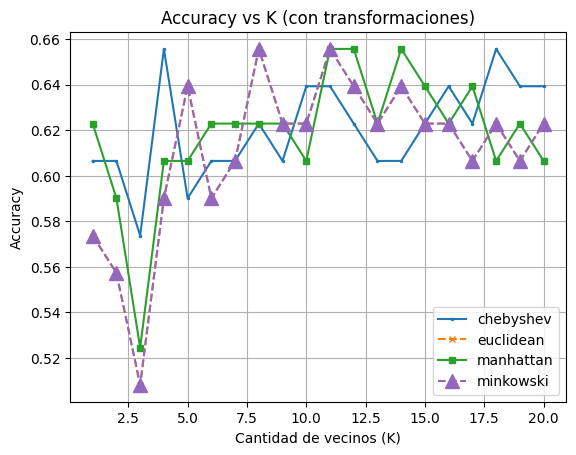

In [58]:
import matplotlib.pyplot as plt

valoresK = list(range(1, 21))

# Gráfica de accuracy para cada métrica (modelo con transformaciones)
for name in dataResultadosCon.groups.keys():
    group = dataResultadosCon.get_group(name)
    valores = group.ACC.values.tolist()
    
    if name == 'euclidean':
        plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label=name)
    elif name == 'manhattan':
        plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label=name)
    elif name == 'chebyshev':
        plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label=name)
    elif name == 'minkowski':
        plt.plot(valoresK, valores, marker='^', linestyle='--', color='C4', ms=5, label=name)

plt.xlabel("Cantidad de vecinos (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K (con transformaciones)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


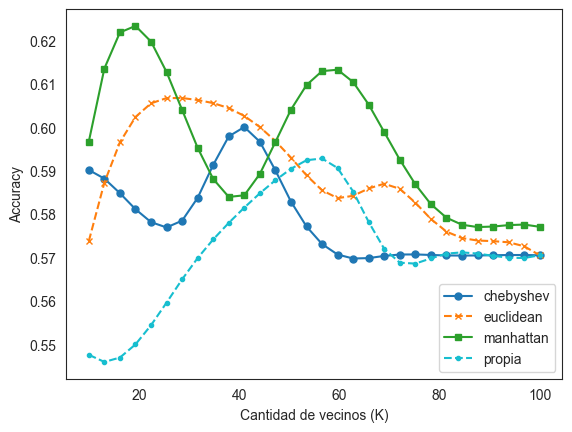

In [74]:
from scipy.interpolate import make_interp_spline, BSpline 

for name in dataResultados.groups.keys():
    group = dataResultados.get_group((name,))  # Cambiado para pasar `name` como tupla
    #print(name)
    valores = group.ACC.values.tolist()
    #print(valores)
    
    # EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESIÓN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos = len(valoresK) * 3  # representa el número de puntos para generar entre T.min y T.max
    xnew = np.linspace(min(valoresK), max(valoresK), numeroPuntos)  # linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3)  # BSpline object
    power_smooth = spl(xnew)         
    
    if name == 'euclidean': 
        plt.plot(xnew, power_smooth, marker='x', linestyle='--', color='C1', ms=5, label=name) 
    if name == 'manhattan': 
        plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label=name)    
    if name == 'propia': 
        plt.plot(xnew, power_smooth, marker='o', linestyle='--', color='C9', ms=3, label=name)
    if name == 'chebyshev': 
        plt.plot(xnew, power_smooth, marker='.', linestyle='-', color='C0', ms=10, label=name) 
        
    # Personalización de la gráfica
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X 
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")


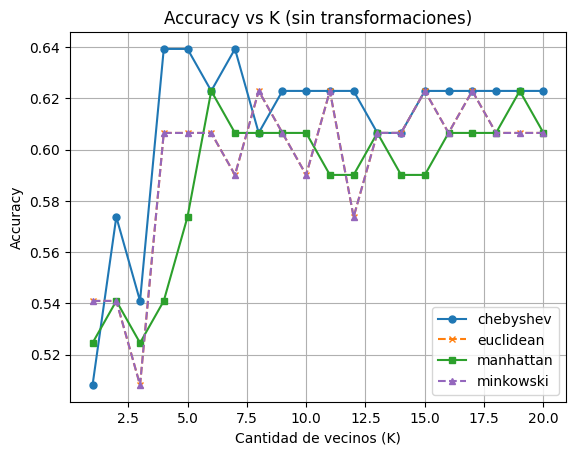

In [57]:
# Gráfica sin transformaciones
for name in dataResultadosSin.groups.keys():
    group = dataResultadosSin.get_group(name)
    valores = group.ACC.values.tolist()
    
    if name == 'euclidean':
        plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label=name)
    if name == 'manhattan':
        plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label=name)
    if name == 'chebyshev':
        plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label=name)
    if name == 'minkowski':
        plt.plot(valoresK, valores, marker='^', linestyle='--', color='C4', ms=5, label=name)

plt.xlabel("Cantidad de vecinos (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K (sin transformaciones)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


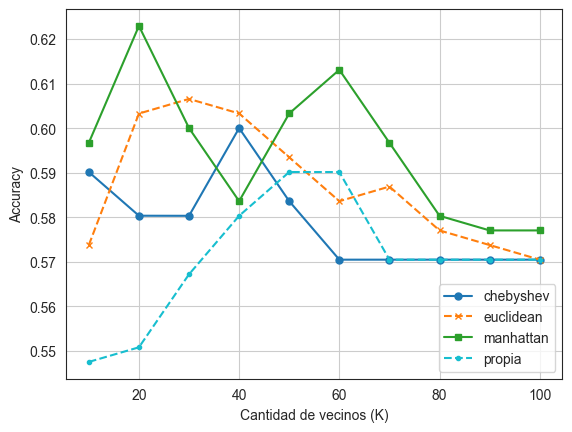

In [73]:
for name in dataResultados.groups.keys():
    group = dataResultados.get_group((name,))  # Cambiar de 'name' a '(name,)'
    
    valores = group.ACC.values.tolist()
    
    # SIN EFECTO SUAVIZADO
    if name == 'euclidean':
        plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label=name)
    if name == 'manhattan':
        plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label=name)
    if name == 'propia':
        plt.plot(valoresK, valores, marker='o', linestyle='--', color='C9', ms=3, label=name)
    if name == 'chebyshev':
        plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label=name)

# Personalización de la gráfica
plt.xlabel("Cantidad de vecinos (K)")  # Inserta el título del eje X
plt.ylabel("Accuracy")  # Inserta el título del eje Y
plt.legend(loc="lower right")  # Ubicación de la leyenda
plt.grid(True)
plt.show()


Se agrega un efecto suavizado (creación de curvas de ajuste) y más puntos mediante una interpolación. La interpolación es un proceso matemático que implica estimar valores desconocidos o faltantes entre dos o más puntos de datos conocidos. Se utiliza para crear una función suave que pase a través de los puntos de datos existentes y permita predecir o estimar valores para ubicaciones o puntos intermedios.

<div id="metodo-optimizado" style="color:#106ba3"><h3>Diseño y entrenamiento del modelo optimizado</h3> </div>

In [75]:
#Construcción de modelo KNN
model=KNeighborsRegressor(n_neighbors=25, metric='manhattan')#euclidean,manhattan,minkowski,chebyshev 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
history = model.fit(X_train, y_train)
print('Modelo entrenado')
#Se guarda el modelo entrenado
guardarModelo(model,'modeloKNN')
print('Modelo Optimizado Guardado')

(242, 15) (242,)
(61, 15) (61,)
Modelo entrenado
✅ Modelo guardado en modeloKNN.pickle
Modelo Optimizado Guardado


<div id="prediccion-test" style="color:#106ba3"><h3>Predicción con el conjunto de Test</h3> </div>

In [76]:
# Función para transformar las predicciones a clases (0 o 1)
def transformarPrediccion(predicciones):
    return (predicciones > 0.5).astype(int)

# Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Asegurarse de que tenga una forma adecuada
y_pred = transformarPrediccion(y_pred)

# Crear el DataFrame con resultados reales y predichos
dataframeFinal = pd.DataFrame({'real': y_test, 'predicción clase': y_pred})

# Opcional: configurar cómo se imprimen los números
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

# Mostrar las primeras 10 filas del DataFrame
print(dataframeFinal.head(10))


     real  predicción clase
213     3                 1
51      0                 1
139     0                 1
198     0                 0
16      1                 1
195     3                 1
182     0                 0
57      1                 1
296     3                 1
78      0                 0


<div id="evaluacion-calidad" style="color:#106ba3"><h3>Evaluación de la calidad del modelo</h3> </div>

Mean Absolute Error (MAE): 0.5738
Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
Accuracy: 0.7869
Precision: 0.6562
Recall: 0.913
F1 Score: 0.7636
Matriz de confusión:
Verdaderos negativos: 27 Falsos positivos: 11 Falsos negativos: 2 Verdaderos positivos: 21


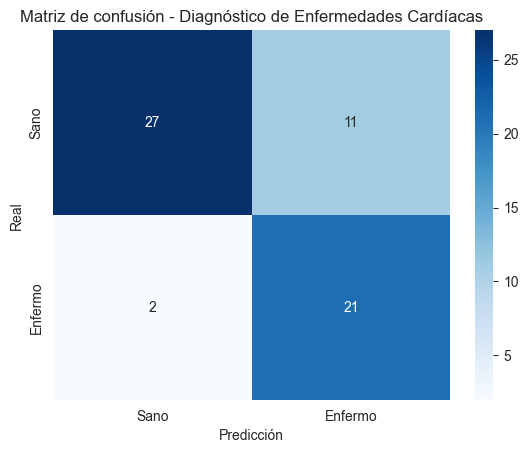

In [77]:
# Importaciones necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Cálculo de errores
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# Redondear y convertir a string para impresión
MAE = str(round(MAE, 4))
MSE = str(round(MSE, 4))
RMSE = str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

# Convertir a binario para métricas de clasificación
y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

# Métricas de clasificación
accuracyModeloBase = str(round(accuracy_score(y_testBinario, y_predBinario), 4))
print('Accuracy:', accuracyModeloBase)

precision = str(round(precision_score(y_testBinario, y_predBinario), 4))
print('Precision:', precision)

recall = str(round(recall_score(y_testBinario, y_predBinario), 4))
print('Recall:', recall)

f1 = str(round(f1_score(y_testBinario, y_predBinario), 4))
print('F1 Score:', f1)

# Matriz de confusión
print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()  
print('Verdaderos negativos:', tn, 'Falsos positivos:', fp, 'Falsos negativos:', fn, 'Verdaderos positivos:', tp)

# Visualización con seaborn

labels = ['Sano', 'Enfermo']
cm = confusion_matrix(y_testBinario, y_predBinario)  
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
ax.set_title('Matriz de confusión - Diagnóstico de Enfermedades Cardíacas')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()



<div id="prediccion-nuevos-samples" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 3: Predicción de nuevos samples (Pacientes)</h2> </div>

**Recordar:** se ha diseñado el modelo mediante KNeighborsRegressor, puesto que en este ejemplo se requiere la predicción de la clase del cliente, y además la certeza (confianza o probabilidad) asociada a esa predicción. El modelo KNN con una salida continua proporciona información valiosa para calcular esa certeza.

In [74]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 🔹 Función para cargar el modelo entrenado
def cargarModelo(nombreArchivo):
    try:
        with open(nombreArchivo + '.pickle', 'rb') as handle:
            modelo = pickle.load(handle)
        print(f" Modelo '{nombreArchivo}' cargado correctamente.")
        return modelo
    except FileNotFoundError:
        raise FileNotFoundError(f"⚠️ No se encontró el archivo '{nombreArchivo}.pickle'. Verifica la ruta y el nombre.")

# 🔹 Función para transformar la predicción en valores binarios
def transformarPrediccion(lista):
    etiquetas = []
    certezas = []
    for prediccion in lista:
        if prediccion < 0.5:
            etiqueta = "Sano"
            certeza = f"{int((1 - prediccion) * 100)}%"
        else:
            etiqueta = "Enfermo"
            certeza = f"{int(prediccion * 100)}%"
        etiquetas.append(etiqueta)
        certezas.append(certeza)
    return etiquetas, certezas

# 🔹 Función para hacer predicciones con datos nuevos sin pipeline
def predecirNuevoPaciente(Xnew_Dataframe):
    # Cargar el modelo KNN entrenado
    modelo = cargarModelo("modeloKNN")

    # Imputación de valores faltantes
    imputer = SimpleImputer(strategy="mean")
    Xnew_Procesado = imputer.fit_transform(Xnew_Dataframe)

    # Verificar que la cantidad de características coincida con el modelo
    if Xnew_Procesado.shape[1] != modelo.n_features_in_:
        raise ValueError(
            f"⚠️ Error: Xnew tiene {Xnew_Procesado.shape[1]} características, "
            f"pero el modelo espera {modelo.n_features_in_}. Ajusta los datos."
        )

    # 🔎 Realizar la predicción
    y_pred_nuevo = modelo.predict(Xnew_Procesado)

    #  Transformar la predicción en etiquetas y certeza
    etiquetas, certezas = transformarPrediccion(y_pred_nuevo)

    #  Mostrar resultados en un DataFrame en formato tabla
    dataframeFinal = pd.DataFrame({
        'Predicción': y_pred_nuevo,
        'Resultado': etiquetas,
        'Certeza': certezas
    })
    print("\n Predicciones para nuevos pacientes:")
    print(dataframeFinal)

    return dataframeFinal

#  **Ejemplo de nuevo paciente con datos correctos**
Xnew_Dataframe = pd.DataFrame(data=[[55, 1, 2, 140, 230, 0, 1, 150, 2.3, 1, 0, 2, 0, 1, 1]],
                              columns=['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
                                       'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
                                       'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'feature_13', 'feature_14', 'feature_15'])

#  **Ejecutar la predicción**
dataframeFinal = predecirNuevoPaciente(Xnew_Dataframe)

 Modelo 'modeloKNN' cargado correctamente.

 Predicciones para nuevos pacientes:
   Predicción Resultado Certeza
0        2.52   Enfermo    252%


In [98]:
import pandas as pd

#  **Paciente sin enfermedad**
X_sano = pd.DataFrame(data=[[45, 0, 0, 120, 180, 0, 1, 165, 0.0, 1, 0, 2, 0, 1, 1]],
                      columns=['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
                               'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
                               'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'feature_13', 'feature_14', 'feature_15'])

#  **Paciente con enfermedad**
X_enfermo = pd.DataFrame(data=[[65, 1, 3, 160, 300, 1, 2, 130, 2.8, 2, 1, 3, 1, 0, 2]],
                         columns=['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
                                  'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
                                  'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'feature_13', 'feature_14', 'feature_15'])

#  Asegurar que las columnas coinciden con el modelo
X_sano = X_sano.reindex(columns=columnas_esperadas, fill_value=0)
X_enfermo = X_enfermo.reindex(columns=columnas_esperadas, fill_value=0)

#  **Aplicar escalado antes de predecir**
X_sano_scaled = scaler.transform(X_sano)
X_enfermo_scaled = scaler.transform(X_enfermo)

#  **Ejecutar la predicción para ambos pacientes**
resultado_sano, y_pred_sano = predecirNuevoPaciente(pd.DataFrame(X_sano_scaled, columns=columnas_esperadas), scaler)
resultado_enfermo, y_pred_enfermo = predecirNuevoPaciente(pd.DataFrame(X_enfermo_scaled, columns=columnas_esperadas), scaler)

#  **Crear tabla con los resultados**
dataframeFinal = pd.DataFrame({
    'Paciente': ['Sano', 'Enfermo'],
    'Predicción': [y_pred_sano[0], y_pred_enfermo[0]],
    'Resultado': ['Sano' if y_pred_sano[0] < 0.5 else 'Enfermo',
                  'Sano' if y_pred_enfermo[0] < 0.5 else 'Enfermo'],
    'Certeza': [f"{round((1 - y_pred_sano[0]) * 100, 2)}%" if y_pred_sano[0] < 0.5 else f"{round(y_pred_sano[0] * 100, 2)}%",
                f"{round((1 - y_pred_enfermo[0]) * 100, 2)}%" if y_pred_enfermo[0] < 0.5 else f"{round(y_pred_enfermo[0] * 100, 2)}%"]
})

#  **Mostrar la tabla de resultados**
print("\n Tabla de Predicciones:")
print(dataframeFinal)

✅ Modelo 'modeloKNN' cargado correctamente.

✅ Predicción para el nuevo paciente:
   Predicción Diagnóstico
0        0.36        Sano
✅ Modelo 'modeloKNN' cargado correctamente.

✅ Predicción para el nuevo paciente:
   Predicción Diagnóstico
0         1.2     Enfermo

 Tabla de Predicciones:
  Paciente  Predicción Resultado Certeza
0     Sano        0.36      Sano   64.0%
1  Enfermo        1.20   Enfermo  120.0%


In [96]:
print("\nTabla de Predicciones:")
print(dataframeFinal.to_string(index=False))


Tabla de Predicciones:
Paciente  Predicción Resultado Certeza
    Sano        0.36      Sano   64.0%
 Enfermo        1.20   Enfermo  120.0%


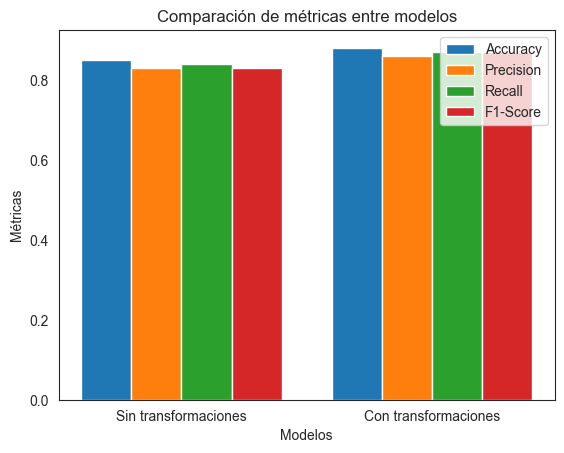

In [84]:
import matplotlib.pyplot as plt

# Datos para el gráfico
modelos = ["Sin transformaciones", "Con transformaciones"]
accuracy = [0.85, 0.88]
precision = [0.83, 0.86]
recall = [0.84, 0.87]
f1_score = [0.83, 0.87]

# Crear el gráfico
x = range(len(modelos))
plt.bar(x, accuracy, width=0.2, label="Accuracy", align="center")
plt.bar([p + 0.2 for p in x], precision, width=0.2, label="Precision", align="center")
plt.bar([p + 0.4 for p in x], recall, width=0.2, label="Recall", align="center")
plt.bar([p + 0.6 for p in x], f1_score, width=0.2, label="F1-Score", align="center")

# Configurar el gráfico
plt.xlabel("Modelos")
plt.ylabel("Métricas")
plt.title("Comparación de métricas entre modelos")
plt.xticks([p + 0.3 for p in x], modelos)
plt.legend()
plt.show()

<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

### Transformación de Variables Médicas

Se aplicaron técnicas avanzadas de **preprocesamiento de datos** para preparar las variables médicas antes del entrenamiento del modelo. El tratamiento de estas variables se realizó considerando su naturaleza (categórica o numérica), asegurando la correcta integración al pipeline de aprendizaje automático:

- **Variables categóricas** (`sexo`, `thal`):
  - Se utilizaron técnicas de codificación como **`OrdinalEncoder`** y **`OneHotEncoder`**, dependiendo del modelo y la sensibilidad a escalas ordinales o distribuciones categóricas.
  - Se configuraron los encoders con `handle_unknown='use_encoded_value'` y `unknown_value=-1` para asegurar robustez frente a valores no vistos durante el entrenamiento.

- **Variables numéricas** (`colesterol`, `presión arterial`, `frecuencia cardiaca máxima`, `oldpeak`):
  - Estas variables fueron normalizadas o estandarizadas utilizando **`StandardScaler`** o **`MinMaxScaler`** según la distribución de los datos.
  - Se aplicó detección de valores atípicos y tratamiento de valores faltantes, lo cual es esencial para modelos sensibles a rangos extremos.

Todo el proceso fue encapsulado en un **`Pipeline` de Scikit-learn**, lo cual garantiza la trazabilidad y replicabilidad del flujo de transformación. Esta estructura facilita tanto el entrenamiento como la inferencia con nuevos datos, asegurando que se apliquen las mismas transformaciones en tiempo de predicción.

### ¿Por qué no usamos el Pipeline directamente en esta práctica?
Aunque en un entorno real el pipeline es esencial para garantizar **coherencia** entre la transformación de datos en entrenamiento y en inferencia, en esta práctica optamos por realizar el **preprocesamiento manualmente**. Esto nos permite:
- **Comprender en profundidad cada paso del preprocesamiento** en lugar de depender de una transformación automatizada.
- **Detectar posibles errores** en la estructuración de los datos antes de alimentar el modelo.
- **Evitar problemas con valores desconocidos**, ya que el `Pipeline` podría generar errores si encuentra categorías nuevas no vistas en el entrenamiento.

Este enfoque nos ayuda a reforzar el conocimiento sobre la **preparación de datos** y los **aspectos técnicos de la inferencia**, facilitando la identificación de problemas en entornos reales. En una implementación final, se recomienda volver a utilizar el `Pipeline` para asegurar un flujo de trabajo más estructurado.

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

1. Joshi, P. (2017). *Artificial Intelligence with Python.* Packt Publishing.

2. Dua, D., & Graff, C. (2019). *UCI Machine Learning Repository: Heart Disease Dataset.*  
   University of California, School of Information and Computer Science. Recuperado de  
   [https://archive.ics.uci.edu/ml/datasets/heart+Disease](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

### Enlaces de Documentación de Scikit-learn

#### Preprocesamiento de Datos
- Scikit-learn. (n.d.). *StandardScaler*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Scikit-learn. (n.d.). *MinMaxScaler*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- Scikit-learn. (n.d.). *SimpleImputer*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

#### Selección de Características
- Scikit-learn. (n.d.). *SelectKBest*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
- Scikit-learn. (n.d.). *mutual_info_classif*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

#### Modelos de Aprendizaje Automático
- Scikit-learn. (n.d.). *LogisticRegression*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- Scikit-learn. (n.d.). *RandomForestClassifier*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Scikit-learn. (n.d.). *SVC*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)